# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

# warnings.warn("This is a custom warning message", UserWarning)


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import random
from pathlib import Path
import geopandas as gpd

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0      # As of now, matplotlib version 3.10.0 does not exist — the latest available release is 3.8.x (as of April 2025).
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

In [8]:
import os

# List files in the folder to confirm the shapefile name
os.listdir("G:\\My Drive\\NYC_Data\\taxi_zones")


['taxi_zones.dbf',
 'taxi_zones.prj',
 'taxi_zones.sbn',
 'taxi_zones.sbx',
 'taxi_zones.shp',
 'taxi_zones.shp.xml',
 'taxi_zones.shx']

In [10]:
# Testing Path for Folder and files before running my function, which will read all the file in one program codes.

folder_path = "G:\\My Drive\\NYC_Data\\2023\\"
file_names = [f"2023-{i}.parquet" for i in range(1, 13)]
file_paths = [folder_path + fname for fname in file_names]

print ("Folder Path is : ",folder_path)
print ('\n')
print("File Name are: ",file_names)
print ('\n')
print("File Path is :  ", file_paths)


Folder Path is :  G:\My Drive\NYC_Data\2023\


File Name are:  ['2023-1.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet']


File Path is :   ['G:\\My Drive\\NYC_Data\\2023\\2023-1.parquet', 'G:\\My Drive\\NYC_Data\\2023\\2023-2.parquet', 'G:\\My Drive\\NYC_Data\\2023\\2023-3.parquet', 'G:\\My Drive\\NYC_Data\\2023\\2023-4.parquet', 'G:\\My Drive\\NYC_Data\\2023\\2023-5.parquet', 'G:\\My Drive\\NYC_Data\\2023\\2023-6.parquet', 'G:\\My Drive\\NYC_Data\\2023\\2023-7.parquet', 'G:\\My Drive\\NYC_Data\\2023\\2023-8.parquet', 'G:\\My Drive\\NYC_Data\\2023\\2023-9.parquet', 'G:\\My Drive\\NYC_Data\\2023\\2023-10.parquet', 'G:\\My Drive\\NYC_Data\\2023\\2023-11.parquet', 'G:\\My Drive\\NYC_Data\\2023\\2023-12.parquet']


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
## Starting Loading and Sampling the data together 

In [11]:

# === CONFIGURATION ===
folder_path = "G:\\My Drive\\NYC_Data\\2023\\"
file_names = [f"2023-{i}.parquet" for i in range(1, 13)]
file_paths = [folder_path + fname for fname in file_names]

# datetime_col = 'tpep_pickup_datetime' 
datetime_col = 'tpep_pickup_datetime'

# === Writing a function, so my sample can pickup hour wise and day wise data  ===

def sample_one_hour_per_day(df):
    df[datetime_col] = pd.to_datetime(df[datetime_col])
    df['date'] = df[datetime_col].dt.date
    sampled_list = []

    for day, group in df.groupby('date'):
        hours = group[datetime_col].dt.hour.unique()
        if len(hours) > 0:
            hour = random.choice(hours)
            hour_df = group[group[datetime_col].dt.hour == hour]
            sampled_list.append(hour_df)

    return pd.concat(sampled_list, ignore_index=True) if sampled_list else pd.DataFrame()

# === STEP 1: Count total rows across 12 files, which all files provided to us for analysis for the year 2023. ===
# The formia i have used for sampleing, is already mentioned in the Report itself, please visit to see that.

file_counts = []
for path in file_paths:
    try:
        df = pd.read_parquet(path)
        count = df.shape[0]
        file_counts.append((path, count))
    except Exception as e:
        print(f"Error reading {path}: {e}")

total_records = sum(count for _, count in file_counts)
target_sample_size = int(total_records * 0.05)
print(f"Total Records: {total_records}, Target Sample Size (5%): {target_sample_size}")

# === STEP 2: Apply time-based filtering === where i need to pick up the data sample at lest 1 hour per day, the maximum can be any
intermediate_sample_data = []
total_sampled_count = 0

for path, count in file_counts:
    try:
        df = pd.read_parquet(path)
        if df.empty or count == 0:
            print(f"Skipped empty: {path}")
            continue

        sampled_df = sample_one_hour_per_day(df)
        intermediate_sample_data.append((path, count, sampled_df))
        total_sampled_count += len(sampled_df)

    except Exception as e:
        print(f"Error processing {path}: {e}")

# === STEP 3: Scale proportionally to achieve accurate 5% sampling === It need to give me output, showing that 5% od total dat is being hit
scaling_factor = target_sample_size / total_sampled_count if total_sampled_count > 0 else 0
print(f"Scaling factor to hit 5%: {round(scaling_factor, 4)}")

final_dataframes = []
summary = []

for path, original_count, time_filtered_df in intermediate_sample_data:
    n_rows = len(time_filtered_df)
    adjusted_sample_size = int(n_rows * scaling_factor)

    if adjusted_sample_size < n_rows:
        final_df = time_filtered_df.sample(n=adjusted_sample_size, random_state=42)
    else:
        final_df = time_filtered_df  # No downsampling needed

    final_dataframes.append(final_df)

    summary.append({
        "File": Path(path).name,
        "Original Rows": original_count,
        "After Time-Based Filter": n_rows,
        "Final Sampled Rows": len(final_df),
        "Final Sample %": round(len(final_df) / original_count * 100, 4)
    })

# === STEP 4: Save final merged sample and summary === Conversion of file in CSV also includes here, and it will be creatd in the same path folder
if final_dataframes:
    final_sample = pd.concat(final_dataframes, ignore_index=True)

    parquet_output = folder_path + "2023_time_hour_sample_5pct.parquet"
    csv_output = folder_path + "2023_time_hour_sample_5pct.csv"
    summary_output = folder_path + "2023_sampling_summary.csv"

    final_sample.to_parquet(parquet_output, index=False)
    final_sample.to_csv(csv_output, index=False)
    pd.DataFrame(summary).to_csv(summary_output, index=False)

    print("Done: Accurate 5% Sample + Summary Saved.")
    print(f"Parquet: {parquet_output}")
    print(f"CSV: {csv_output}")
    print(f"Summary: {summary_output}")
else:
    print("No data sampled.")


Total Records: 37928560, Target Sample Size (5%): 1896428
Scaling factor to hit 5%: 1.156
Done: Accurate 5% Sample + Summary Saved.
Parquet: G:\My Drive\NYC_Data\2023\2023_time_hour_sample_5pct.parquet
CSV: G:\My Drive\NYC_Data\2023\2023_time_hour_sample_5pct.csv
Summary: G:\My Drive\NYC_Data\2023\2023_sampling_summary.csv


In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

In [13]:
# Test for the Parquet file, if it cas be read or having any issue, but it is working fine it seems
sample_path = "G:\\My Drive\\NYC_Data\\2023\\2023_time_hour_sample_5pct.parquet"

# Read the file
sample_df = pd.read_parquet(sample_path)

# Preview the data
sample_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2008-12-31 23:04:41   2009-01-01 19:55:36              1.0   
1         2  2008-12-31 23:01:42   2009-01-01 14:29:11              1.0   
2         2  2022-10-24 17:37:47   2022-10-24 17:37:51              1.0   
3         2  2022-10-25 13:03:37   2022-10-25 13:03:40              2.0   
4         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.00         1.0                  N             7             7   
1          17.76         2.0                  N           132           230   
2           0.00         5.0                  N             1             1   
3           0.22         5.0                  N           138           264   
4           0.86         1.0                  N           141           140   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    0.0      0.0         0.0          0.00   
1             2  ...    0.0      0.5         0.0          6.55   
2             2  ...    0.0      0.0         0.0          0.00   
3             1  ...    0.0      0.5        15.7          0.00   
4             1  ...    1.0      0.5         2.0          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    0.0          0.00                   0.0          0.0   
1                    1.0         80.55                   2.5          0.0   
2                    0.3        120.30                   0.0          0.0   
3                    0.3         78.50                   0.0          0.0   
4                    1.0         13.50                   2.5          0.0   

         date Airport_fee  
0  2008-12-31         NaN  
1  2008-12-31         NaN  
2  2022-10-24         NaN  
3  2022-10-25         NaN  
4  2022-12-31         NaN  

[5 rows x 21 columns]

In [ ]:
# Read CSV File created just now for further analysis

In [7]:
df=pd.read_csv("G:\\My Drive\\NYC_Data\\2023\\2023_time_hour_sample_5pct.csv")
df.head()
           

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2     12/31/2008 23:04        1/1/2009 19:55              1.0   
1         2     12/31/2008 23:01        1/1/2009 14:29              1.0   
2         2     10/24/2022 20:01      10/24/2022 20:01              1.0   
3         2      10/25/2022 3:45       10/25/2022 3:45              1.0   
4         2     12/31/2022 14:24      12/31/2022 14:35              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.00         1.0                  N             7             7   
1          17.76         2.0                  N           132           230   
2           0.00         5.0                  N            17            17   
3           0.02         5.0                  N             1             1   
4           0.41         1.0                  N            48           163   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    0.0      0.0        0.00          0.00   
1             2  ...    0.0      0.5        0.00          6.55   
2             1  ...    0.0      0.0        9.06          0.00   
3             1  ...    0.0      0.0        5.00          0.00   
4             2  ...    1.0      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    0.0          0.00                   0.0          0.0   
1                    1.0         80.55                   2.5          0.0   
2                    0.3         54.36                   0.0          0.0   
3                    0.3        120.30                   0.0          0.0   
4                    1.0         15.00                   2.5          0.0   

         date Airport_fee  
0  12/31/2008         NaN  
1  12/31/2008         NaN  
2  10/24/2022         NaN  
3  10/25/2022         NaN  
4  12/31/2022         NaN  

[5 rows x 21 columns]

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df=pd.read_csv("G:\\My Drive\\NYC_Data\\2023\\2023_time_hour_sample_5pct.csv")
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2     12/31/2008 23:04        1/1/2009 19:55              1.0   
1         2     12/31/2008 23:01        1/1/2009 14:29              1.0   
2         2     10/24/2022 20:01      10/24/2022 20:01              1.0   
3         2      10/25/2022 3:45       10/25/2022 3:45              1.0   
4         2     12/31/2022 14:24      12/31/2022 14:35              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.00         1.0                  N             7             7   
1          17.76         2.0                  N           132           230   
2           0.00         5.0                  N            17            17   
3           0.02         5.0                  N             1             1   
4           0.41         1.0                  N            48           163   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    0.0      0.0        0.00          0.00   
1             2  ...    0.0      0.5        0.00          6.55   
2             1  ...    0.0      0.0        9.06          0.00   
3             1  ...    0.0      0.0        5.00          0.00   
4             2  ...    1.0      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    0.0          0.00                   0.0          0.0   
1                    1.0         80.55                   2.5          0.0   
2                    0.3         54.36                   0.0          0.0   
3                    0.3        120.30                   0.0          0.0   
4                    1.0         15.00                   2.5          0.0   

         date Airport_fee  
0  12/31/2008         NaN  
1  12/31/2008         NaN  
2  10/24/2022         NaN  
3  10/25/2022         NaN  
4  12/31/2022         NaN  

[5 rows x 21 columns]

In [19]:
df.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.640445e+06     1.584782e+06   1.640445e+06  1.584782e+06   
mean   1.736278e+00     1.365495e+00   3.919994e+00  1.646431e+00   
std    4.453427e-01     8.921610e-01   2.282957e+02  7.473470e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   1.934294e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.640445e+06  1.640445e+06  1.640445e+06  1.640445e+06  1.640445e+06   
mean   1.654353e+02  1.642043e+02  1.160619e+00  1.976401e+01  1.600205e+00   
std    6.383143e+01  6.978147e+01  5.041360e-01  1.837908e+01  1.827244e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00 -5.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  2.320110e+03  5.168000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.640445e+06  1.640445e+06  1.640445e+06           1.640445e+06   
mean   4.953276e-01  3.548945e+00  5.902631e-01           9.990056e-01   
std    4.873563e-02  4.046424e+00  2.179713e+00           3.103264e-02   
min   -5.000000e-01  0.000000e+00  0.000000e+00          -1.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.850000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.420000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  4.400800e+02  8.400000e+01           1.000000e+00   

       total_amount  congestion_surcharge    airport_fee   Airport_fee  
count  1.640445e+06          1.584782e+06  132076.000000  1.452706e+06  
mean   2.884553e+01          2.310258e+00       0.106198  1.444399e-01  
std    2.290361e+01          6.623669e-01       0.348628  4.700915e-01  
min   -6.500000e+00         -2.500000e+00      -1.250000 -1.750000e+00  
25%    1.596000e+01          2.500000e+00       0.000000  0.000000e+00  
50%    2.100000e+01          2.500000e+00       0.000000  0.000000e+00  
75%    3.072000e+01          2.500000e+00       0.000000  0.000000e+00  
max    2.372790e+03          2.500000e+00       1.250000  1.750000e+00

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1048575 non-null  int64  
 1   tpep_pickup_datetime   1048575 non-null  object 
 2   tpep_dropoff_datetime  1048575 non-null  object 
 3   passenger_count        1020345 non-null  float64
 4   trip_distance          1048575 non-null  float64
 5   RatecodeID             1020345 non-null  float64
 6   store_and_fwd_flag     1020345 non-null  object 
 7   PULocationID           1048575 non-null  int64  
 8   DOLocationID           1048575 non-null  int64  
 9   payment_type           1048575 non-null  int64  
 10  fare_amount            1048575 non-null  float64
 11  extra                  1048575 non-null  float64
 12  mta_tax                1048575 non-null  float64
 13  tip_amount             1048575 non-null  float64
 14  tolls_amount      

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [42]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date',
       'Airport_fee'],
      dtype='object')

In [ ]:
# # Calculate missing value stats

In [11]:
missing_stats = df.isnull().sum().to_frame('Missing Values')
print (missing_stats)

                       Missing Values
VendorID                            0
tpep_pickup_datetime                0
tpep_dropoff_datetime               0
passenger_count                 28230
trip_distance                       0
RatecodeID                      28230
store_and_fwd_flag              28230
PULocationID                        0
DOLocationID                        0
payment_type                        0
fare_amount                         0
extra                               0
mta_tax                             0
tip_amount                          0
tolls_amount                        0
improvement_surcharge               0
total_amount                        0
congestion_surcharge            28230
airport_fee                    916499
date                                0
Airport_fee                    160306


In [46]:
missing_stats['Missing %'] = (missing_stats['Missing Values'] / len(df)) * 100
print(missing_stats)

                       Missing Values  Missing %
VendorID                            0   0.000000
tpep_pickup_datetime                0   0.000000
tpep_dropoff_datetime               0   0.000000
passenger_count                 28230   2.692225
trip_distance                       0   0.000000
RatecodeID                      28230   2.692225
store_and_fwd_flag              28230   2.692225
PULocationID                        0   0.000000
DOLocationID                        0   0.000000
payment_type                        0   0.000000
fare_amount                         0   0.000000
extra                               0   0.000000
mta_tax                             0   0.000000
tip_amount                          0   0.000000
tolls_amount                        0   0.000000
improvement_surcharge               0   0.000000
total_amount                        0   0.000000
congestion_surcharge            28230   2.692225
airport_fee                    916499  87.404239
date                

In [48]:
missing_stats['Data Type'] = df.dtypes
print(missing_stats)

                       Missing Values  Missing % Data Type
VendorID                            0   0.000000     int64
tpep_pickup_datetime                0   0.000000    object
tpep_dropoff_datetime               0   0.000000    object
passenger_count                 28230   2.692225   float64
trip_distance                       0   0.000000   float64
RatecodeID                      28230   2.692225   float64
store_and_fwd_flag              28230   2.692225    object
PULocationID                        0   0.000000     int64
DOLocationID                        0   0.000000     int64
payment_type                        0   0.000000     int64
fare_amount                         0   0.000000   float64
extra                               0   0.000000   float64
mta_tax                             0   0.000000   float64
tip_amount                          0   0.000000   float64
tolls_amount                        0   0.000000   float64
improvement_surcharge               0   0.000000   float

In [50]:
missing_stats = missing_stats.sort_values(by='Missing %', ascending=False)
print(missing_stats)

                       Missing Values  Missing % Data Type
airport_fee                    916499  87.404239   float64
Airport_fee                    160306  15.287986   float64
passenger_count                 28230   2.692225   float64
RatecodeID                      28230   2.692225   float64
store_and_fwd_flag              28230   2.692225    object
congestion_surcharge            28230   2.692225   float64
mta_tax                             0   0.000000   float64
date                                0   0.000000    object
total_amount                        0   0.000000   float64
improvement_surcharge               0   0.000000   float64
tolls_amount                        0   0.000000   float64
tip_amount                          0   0.000000   float64
VendorID                            0   0.000000     int64
extra                               0   0.000000   float64
tpep_pickup_datetime                0   0.000000    object
payment_type                        0   0.000000     int

In [52]:
# View columns with some missing values (up to 50%) to FIX
print("\nColumns to FIX ( <=50% missing ):")
print(missing_stats[(missing_stats['Missing %'] > 0) & (missing_stats['Missing %'] <= 50)])


Columns to FIX ( <=50% missing ):
                      Missing Values  Missing % Data Type
Airport_fee                   160306  15.287986   float64
passenger_count                28230   2.692225   float64
RatecodeID                     28230   2.692225   float64
store_and_fwd_flag             28230   2.692225    object
congestion_surcharge           28230   2.692225   float64


**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [54]:
# View columns with more than 50% missing
print("\nColumns to DROP ( >50% missing ):")
print(missing_stats[missing_stats['Missing %'] > 50])


Columns to DROP ( >50% missing ):
             Missing Values  Missing % Data Type
airport_fee          916499  87.404239   float64


In [ ]:
# Because there are two Airport fees columns, with the difference with capital 'A' and small 'a'. 
#Hence we need to decide to merge both, if there are sufficinect data . so holding the drop decision for a while

In [51]:
#Classify Columns by Type
#Segment 1 = Numerical columns (int/float)
#Segment =2 Categorical columns (object/string, category)

In [56]:
numerical_cols = df.select_dtypes(include=['number']).columns
print (numerical_cols)


Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')


In [58]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
       'date'],
      dtype='object')


In [60]:
#For Numerical Columns (Use Mean or Median)

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)  # or use mean



In [62]:
# For Categorical Columns (Use Mode or "Unknown")

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else "Unknown", inplace=True)


In [64]:
# Confirm Fix
print("Remaining missing values:\n", df.isnull().sum().sort_values(ascending=False).head())


Remaining missing values:
 VendorID                0
extra                   0
date                    0
airport_fee             0
congestion_surcharge    0
dtype: int64


In [65]:
# Optional: Save the Cleaned Data

df.to_csv("2023_time_hour_sample_5pct_cleaned.csv", index=False)

In [70]:
df_clean=pd.read_csv("2023_time_hour_sample_5pct_cleaned.csv")
df_clean.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2008-12-31 23:04:41   2009-01-01 19:55:36              1.0   
1         2  2008-12-31 23:01:42   2009-01-01 14:29:11              1.0   
2         2  2022-10-24 20:01:46   2022-10-24 20:01:48              1.0   
3         2  2022-10-25 03:45:46   2022-10-25 03:45:50              1.0   
4         2  2022-12-31 14:24:54   2022-12-31 14:35:25              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.00         1.0                  N             7             7   
1          17.76         2.0                  N           132           230   
2           0.00         5.0                  N            17            17   
3           0.02         5.0                  N             1             1   
4           0.41         1.0                  N            48           163   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    0.0      0.0        0.00          0.00   
1             2  ...    0.0      0.5        0.00          6.55   
2             1  ...    0.0      0.0        9.06          0.00   
3             1  ...    0.0      0.0        5.00          0.00   
4             2  ...    1.0      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    0.0          0.00                   0.0          0.0   
1                    1.0         80.55                   2.5          0.0   
2                    0.3         54.36                   0.0          0.0   
3                    0.3        120.30                   0.0          0.0   
4                    1.0         15.00                   2.5          0.0   

         date Airport_fee  
0  2008-12-31         0.0  
1  2008-12-31         0.0  
2  2022-10-24         0.0  
3  2022-10-25         0.0  
4  2022-12-31         0.0  

[5 rows x 21 columns]

In [66]:
# Fix the index and drop any columns that are not needed

#Recreate Index After Row Drops

if 'index' in df.columns:
    df_clean = df.drop(columns='index')

df = df.reset_index(drop=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2     12/31/2008 23:04        1/1/2009 19:55              1.0   
1         2     12/31/2008 23:01        1/1/2009 14:29              1.0   
2         2     10/24/2022 20:01      10/24/2022 20:01              1.0   
3         2      10/25/2022 3:45       10/25/2022 3:45              1.0   
4         2     12/31/2022 14:24      12/31/2022 14:35              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.00         1.0                  N             7             7   
1          17.76         2.0                  N           132           230   
2           0.00         5.0                  N            17            17   
3           0.02         5.0                  N             1             1   
4           0.41         1.0                  N            48           163   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    0.0      0.0        0.00          0.00   
1             2  ...    0.0      0.5        0.00          6.55   
2             1  ...    0.0      0.0        9.06          0.00   
3             1  ...    0.0      0.0        5.00          0.00   
4             2  ...    1.0      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    0.0          0.00                   0.0          0.0   
1                    1.0         80.55                   2.5          0.0   
2                    0.3         54.36                   0.0          0.0   
3                    0.3        120.30                   0.0          0.0   
4                    1.0         15.00                   2.5          0.0   

         date Airport_fee  
0  12/31/2008         0.0  
1  12/31/2008         0.0  
2  10/24/2022         0.0  
3  10/25/2022         0.0  
4  12/31/2022         0.0  

[5 rows x 21 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [68]:
# Combine the two airport fee columns
# We will do it in df_clean data frame, because we have just clean it with fix unwanted stuffs

# 1. Identify the Duplicate Columns

airport_fee_columns = [col for col in df.columns if 'airport_fee' in col.lower()]
print(airport_fee_columns)
print(df[airport_fee_columns].head())

# 2. Check for Differences

# See if they're identical
are_equal = df[airport_fee_columns[0]].equals(df[airport_fee_columns[1]])
print("Are the two airport fee columns identical?", are_equal)

# Check where they differ (optional)
df_diff = df[df[airport_fee_columns[0]] != df[airport_fee_columns[1]]]
print(df_diff[[airport_fee_columns[0], airport_fee_columns[1]]])

#3. Combine Into One Column
# If mostly same, prioritize non-null values:

df["airport_fee_combined"] = df[airport_fee_columns[0]].combine_first(df[airport_fee_columns[1]])

#4. Drop the Duplicates

df.drop(columns=airport_fee_columns, inplace=True)
df.rename(columns={"airport_fee_combined": "airport_fee"}, inplace=True)



['airport_fee', 'Airport_fee']
   airport_fee  Airport_fee
0          0.0          0.0
1          0.0          0.0
2          0.0          0.0
3          0.0          0.0
4          0.0          0.0
Are the two airport fee columns identical? False
         airport_fee  Airport_fee
11              1.25         0.00
47              1.25         0.00
59              1.25         0.00
60              1.25         0.00
64              1.25         0.00
...              ...          ...
1048538         0.00         1.75
1048542         0.00         1.75
1048543         0.00         1.75
1048548         0.00         1.75
1048563         0.00         1.75

[89121 rows x 2 columns]


In [ ]:
# So now we can see only single airport_fee column left, which is actually merged column

In [13]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date',
       'Airport_fee'],
      dtype='object')

In [72]:
df["airport_fee"].isnull().sum()

0

In [76]:
df["airport_fee"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1048570    0.0
1048571    0.0
1048572    0.0
1048573    0.0
1048574    0.0
Name: airport_fee, Length: 1048575, dtype: float64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
#If fare_amount is non-zero, then convert all negative values in monetary columns to absolute values (assume input error).
#If fare_amount is zero, then set all monetary values (including fare_amount itself) to zero (likely a free ride or invalid row).

In [ ]:
# Step 1: Identify monetary columns (already done)
monetary_cols = [col for col in df.columns if any(key in col.lower() for key in [
    'fare', 'amount', 'fee', 'toll', 'surcharge', 'total', 'extra', 'mta_tax','tip'])]

# Step 2: Apply the conditional logic
def clean_row(row):
    if row['fare_amount'] != 0:
        # Convert only negative values to absolute
        for col in monetary_cols:
            if pd.notnull(row[col]) and row[col] < 0:
                row[col] = abs(row[col])
    else:
        # Set all monetary values to 0
        for col in monetary_cols:
            row[col] = 0
    return row

# Apply the function row-wise
df = df.apply(clean_row, axis=1)

df.to_csv("cleaned_file_no_negatives.csv", index=False)


In [117]:
# check where values of fare amount are negative

#1: Identify Monetary Columns

# Assuming monetary columns contain keywords like fare, amount, fee, tolls, surcharge, total, tip

monetary_cols = [col for col in df.columns if any(key in col.lower() for key in ['fare', 'amount', 'fee', 'toll', 'surcharge', 'total', 'extra', 'mta_tax','tip'])]

print("Monetary Columns:", monetary_cols)

# 2: Check for Negative Values

# Find columns with negative values
for col in monetary_cols:
    negatives = df[df[col] < 0]
    if not negatives.empty:
        print(f"🔴 Negative values found in '{col}': {len(negatives)} rows")

#Step 3: Fix Negative Values
# Three options depending on the situation:

# a) Option A: Convert to Positive (e.g., input error)

for col in monetary_cols:
    df[col] = df[col].apply(lambda x: abs(x) if x < 0 else x)

# Option B: Set Negative Values to Zero

for col in monetary_cols:
    df[col] = df[col].apply(lambda x: 0 if x < 0 else x)

# Option C: Drop Rows with Negative Values

for col in monetary_cols:
    df = df[df[col] >= 0]

#Step 4: Save or Proceed

df.to_csv("cleaned_file_no_negatives.csv", index=False)


Monetary Columns: ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [ ]:
# Tested with the syntax for negative columns exists

In [114]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        negatives = df[df[col] < 0]
        if not negatives.empty:
            print(f"🔴 Negative values found in '{col}': {len(negatives)} rows")
    else:
        print(f"⚠️ Skipping '{col}' (non-numeric column)")

⚠️ Skipping 'tpep_pickup_datetime' (non-numeric column)
⚠️ Skipping 'tpep_dropoff_datetime' (non-numeric column)
⚠️ Skipping 'store_and_fwd_flag' (non-numeric column)
⚠️ Skipping 'date' (non-numeric column)


Did you notice something different in the `RatecodeID` column for above records?

In [61]:
# Analyse RatecodeID for the negative fare amounts
df["RatecodeID"]


0          1.0
1          2.0
2          5.0
3          5.0
4          1.0
          ... 
1542717    NaN
1542718    NaN
1542719    1.0
1542720    1.0
1542721    5.0
Name: RatecodeID, Length: 1542722, dtype: float64

In [13]:
# Step 1: Filter rows with negative fare
negative_fares = df[df['fare_amount'] < 0]

# Step 2: Analyze RatecodeID distribution in those rows
ratecode_stats = negative_fares['RatecodeID'].value_counts().reset_index()
ratecode_stats.columns = ['RatecodeID', 'Negative Fare Count']

print(ratecode_stats)

Empty DataFrame
Columns: [RatecodeID, Negative Fare Count]
Index: []


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [125]:
# Find the proportion of missing values in each column

df.isnull().mean()

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
date                     0.0
airport_fee              0.0
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [127]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

missing_count = df['passenger_count'].isnull().sum()
print(f"Missing values in passenger_count: {missing_count}")

Missing values in passenger_count: 0


Did you find zeroes in passenger_count? Handle these.

In [129]:
zero_count = (df['passenger_count'] == 0).sum()
print(f"Number of zero entries in passenger_count: {zero_count}")

Number of zero entries in passenger_count: 25371


In [139]:
# Step 1: Define monetary columns
monetary_cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]

# Step 2: Build condition for passenger_count == 0 AND all monetary columns == 0
condition = (df['passenger_count'] == 0) & (df[monetary_cols] == 0).all(axis=1)

# Step 3: Count and preview
count = condition.sum()
print(f"🔍 Rows with passenger_count == 0 AND all monetary columns == 0: {count}")

# Optional: See those rows (for validation)
df_zero_passenger_and_monetary = df[condition]
df_zero_passenger_and_monetary.value_counts().sum()
print(df_zero_passenger_and_monetary.head())



🔍 Rows with passenger_count == 0 AND all monetary columns == 0: 10
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
241823         1  2023-03-23 22:02:33   2023-03-23 22:02:33              0.0   
241824         1  2023-03-23 22:04:02   2023-03-23 22:04:02              0.0   
257489         1  2023-03-26 16:33:06   2023-03-26 16:34:10              0.0   
271846         1  2023-03-28 09:24:21   2023-03-28 09:24:28              0.0   
459129         1  2023-08-09 12:55:03   2023-08-09 12:55:18              0.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
241823            0.0         5.0                  N           107   
241824            0.0         5.0                  N           107   
257489            0.0         2.0                  N           145   
271846            0.0         1.0                  N           145   
459129            0.0         1.0                  N            50   

        DOLocationID  payment_t

In [ ]:
# Drop only 10 , thoese rows, which satisfy conditions
#dropped 10 rows

In [141]:
df = df[~condition]

In [143]:
zero_count = (df['passenger_count'] == 0).sum()
print(f"Number of zero entries in passenger_count: {zero_count}")

Number of zero entries in passenger_count: 25361


In [147]:
# impute rest of the passenger counts with median value
df["passenger_count"].median()

1.0

In [149]:
# Step 1: Calculate median from valid passenger counts (non-zero)
valid_passenger_median = df[df['passenger_count'] > 0]['passenger_count'].median()

# Step 2: Replace 0s with median
df['passenger_count'] = df['passenger_count'].apply(
    lambda x: valid_passenger_median if x == 0 else x
)

# Optional: Confirm no zeros remain
print(f"✅ Remaining rows with passenger_count == 0: {(df['passenger_count'] == 0).sum()}")


✅ Remaining rows with passenger_count == 0: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [151]:
# Fix missing values in 'RatecodeID'

missing_count = df['RatecodeID'].isnull().sum()
print(f"Missing values in RatecodeID: {missing_count}")


Missing values in RatecodeID: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
'''
Negative values might result from:

Data Entry Error: Mistyped or misformatted values.

Data Processing Bug: Subtracted incorrectly during calculations or joins.

Refunds/Reversals: In rare cases, if the surcharge was refunded or reversed (but this should be in a different column).

Wrong Units or Signs: Values could be stored as credits/debits, and interpretation went wrong.
'''

In [155]:
# handle null values in congestion_surcharge
missing_count = df['congestion_surcharge'].isnull().sum()
print(missing_count)


0


In [ ]:
# View all rows with negative congestion_surcharge
df[df['congestion_surcharge'] < 0]

# Option 1: Set negatives to NaN for later imputation
df.loc[df['congestion_surcharge'] < 0, 'congestion_surcharge'] = np.nan

# Option 2: Set them to 0 or a minimum allowed value
df['congestion_surcharge'] = df['congestion_surcharge'].clip(lower=0)

In [ ]:
# Impute with Median:

df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)

# To verify after imputation:
df['congestion_surcharge'].isna().sum()


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [157]:
# Handle any remaining missing values 

# Function to detect missing (NaN, None, blank or whitespace-only strings)

def count_missing_values(df):
    return df.apply(lambda col: col.isna().sum() + col.apply(lambda x: isinstance(x, str) and x.strip() == '').sum())

# Display the count of missing values per column
missing_counts = count_missing_values(df)
print(missing_counts)


# Find NaNs in all columns (Boolean DataFrame):
df.isna()

#Count NaNs in each column:
df.isna().sum()


df['store_and_fwd_flag'].value_counts()


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
airport_fee              0
dtype: int64


store_and_fwd_flag
N    1631057
Y       9378
Name: count, dtype: int64

In [ ]:
# Merge both airport fees column, if it is not done so, and then later impute the airport_fees_column with "median"

In [ ]:
# Combine the two airport fee columns
 # Already done earlier

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

In [ ]:
IQR = Q3 - Q1
Outliers = values < Q1 - 1.5*IQR or > Q3 + 1.5*IQR


In [ ]:
# Auto Outlier Detection Function

In [165]:
from scipy.stats import zscore, normaltest

def detect_outliers_auto(df, z_thresh=3):
    outlier_summary = {}

    for col in df.select_dtypes(include='number').columns:
        data = df[col].dropna()

        # Check if column is normally distributed
        stat, p = normaltest(data)
        is_normal = p > 0.05  # Null hypothesis: data is normal

        if is_normal:
            # Use Z-score method
            z_scores = zscore(data)
            outliers = df[col][np.abs(z_scores) > z_thresh]
            method = "Z-Score"
        else:
            # Use IQR method
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = df[col][(df[col] < lower) | (df[col] > upper)]
            method = "IQR"

        outlier_summary[col] = {
            "Method": method,
            "Outlier Count": len(outliers),
            "Outlier Indexes": outliers.index.tolist()
        }

    return pd.DataFrame(outlier_summary).T


In [167]:
result = detect_outliers_auto(df)
print(result)

                      Method Outlier Count  \
VendorID                 IQR           341   
passenger_count          IQR        362027   
trip_distance            IQR        213670   
RatecodeID               IQR         88070   
PULocationID             IQR             0   
DOLocationID             IQR             0   
payment_type             IQR        344124   
fare_amount              IQR        168435   
extra                    IQR         29335   
mta_tax                  IQR         15311   
tip_amount               IQR        124995   
tolls_amount             IQR        131742   
improvement_surcharge    IQR          1762   
total_amount             IQR        189201   
congestion_surcharge     IQR        120174   

                                                         Outlier Indexes  
VendorID               [141430, 141439, 141470, 141501, 141502, 14688...  
passenger_count        [7, 8, 11, 17, 34, 38, 45, 48, 54, 58, 63, 68,...  
trip_distance          [1, 26, 35, 47,

In [ ]:
#With this change, columns like VendorID, payment_type, etc., which are not true continuous numeric columns, 
#will be skipped, giving you a cleaner and more meaningful outlier summary.

In [ ]:
#The below function will detect the IQR based outliers.

In [169]:
def detect_outliers_auto(df, z_thresh=3, unique_thresh=10):
    outlier_summary = {}

    for col in df.select_dtypes(include='number').columns:
        if df[col].nunique() <= unique_thresh:
            continue  # Skip low-cardinality columns

        data = df[col].dropna()

        # Check for normality
        stat, p = normaltest(data)
        is_normal = p > 0.05

        if is_normal:
            z_scores = zscore(data)
            outliers = df[col][np.abs(z_scores) > z_thresh]
            method = "Z-Score"
        else:
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = df[col][(df[col] < lower) | (df[col] > upper)]
            method = "IQR"

        outlier_summary[col] = {
            "Method": method,
            "Outlier Count": len(outliers),
            "Outlier Indexes": outliers.index.tolist()
        }

    return pd.DataFrame(outlier_summary).T


In [171]:
result = detect_outliers_auto(df)
print(result)

              Method Outlier Count  \
trip_distance    IQR        213670   
PULocationID     IQR             0   
DOLocationID     IQR             0   
fare_amount      IQR        168435   
extra            IQR         29335   
tip_amount       IQR        124995   
tolls_amount     IQR        131742   
total_amount     IQR        189201   

                                                 Outlier Indexes  
trip_distance  [1, 26, 35, 47, 59, 60, 63, 64, 72, 73, 75, 81...  
PULocationID                                                  []  
DOLocationID                                                  []  
fare_amount    [1, 2, 3, 35, 47, 59, 60, 63, 75, 81, 83, 84, ...  
extra          [220, 243, 310, 367, 399, 546, 611, 865, 904, ...  
tip_amount     [35, 60, 75, 81, 83, 95, 100, 131, 135, 136, 1...  
tolls_amount   [1, 14, 26, 35, 54, 60, 72, 73, 75, 81, 100, 1...  
total_amount   [1, 2, 3, 35, 47, 59, 60, 63, 75, 81, 83, 84, ...  


In [ ]:
Fixing Outliers : Fixes them in-place by replacing with the median.

In [ ]:
'''
Replace Outliers with Median (Safe & Simple)

Why Not Drop?: Because: when we are dealing with monetary columns (like fare_amount, total_amount), and 
dropping those rows can remove legitimate high-value trips.

Median replacement is a non-destructive and safer approach.
'''

In [173]:
# The auto detect outlier function, we just ran and saved our output in variable name "result"
outlier_info = result  # Transferring the result or detected outlier in "outlier_info" variable

# the below function will replace outlier valus with median

for col in outlier_info.index:
    outlier_indexes = outlier_info.loc[col, "Outlier Indexes"]
    if outlier_indexes:  # Proceed only if there are any outliers
        median_val = df[col].median()
        df.loc[outlier_indexes, col] = median_val
        print(f"✅ Replaced {len(outlier_indexes)} outliers in '{col}' with median: {median_val}")


✅ Replaced 213670 outliers in 'trip_distance' with median: 1.79
✅ Replaced 168435 outliers in 'fare_amount' with median: 13.5
✅ Replaced 29335 outliers in 'extra' with median: 1.0
✅ Replaced 124995 outliers in 'tip_amount' with median: 2.85
✅ Replaced 131742 outliers in 'tolls_amount' with median: 0.0
✅ Replaced 189201 outliers in 'total_amount' with median: 21.0


In [ ]:
# After replacement, it's a good idea to validate: hence running below syntax

In [175]:
print(df.describe())
# Or also we can re-run your detect_outliers_auto(df) to ensure counts are 0


           VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.640435e+06     1.640435e+06   1.640435e+06  1.640435e+06   
mean   1.736283e+00     1.368561e+00   1.911917e+00  1.624495e+00   
std    4.453403e-01     8.641175e-01   1.277402e+00  7.346536e+00   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   2.300000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   6.920000e+00  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.640435e+06  1.640435e+06  1.640435e+06  1.640435e+06  1.640435e+06   
mean   1.654356e+02  1.642043e+02  1.160609e+00  1.457408e+01  1.469645e+00   
std    6.383146e+01  6.978147e+01  5.041139e-01  7.529644e+00  1.580005e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00 

In [179]:
df["tolls_amount"].unique()

array([0.])

In [183]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
date                      object
airport_fee                 bool
dtype: object

In [185]:
for col in df.columns:
    if df[col].dtype == 'float' and (df[col] == 0.0).all():
        df.drop(columns=[col], inplace=True)
        print(f"✅ Dropped column: {col}")


✅ Dropped column: tolls_amount


In [ ]:
2.3.1 [10 marks]
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:

    Entries where trip_distance is nearly 0 and fare_amount is more than 300
    Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
    Entries where trip_distance is more than 250 miles.
    Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.


In [ ]:
# 4 Conditions:
'''
We will fix one by one with all 4 cases:

1. trip_distance ≈ 0 and fare_amount > 300

df.loc[(df['trip_distance'] < 0.01) & (df['fare_amount'] > 300), ['trip_distance', 'fare_amount']] = [pd.NA, pd.NA]
# or drop
df = df[~((df['trip_distance'] < 0.01) & (df['fare_amount'] > 300))]


2. trip_distance == 0 and fare_amount == 0 but different pickup & dropoff zones

mask = (df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df[pickup_col] != df[dropoff_col])
df = df[~mask]


3. trip_distance > 250

df = df[df['trip_distance'] <= 250]  # Drop
# or
df.loc[df['trip_distance'] > 250, 'trip_distance'] = df['trip_distance'].median()  # Replace with median

4. payment_type == 0

df.loc[df['payment_type'] == 0, 'payment_type'] = pd.NA
# Optional imputation
df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0])

Best Practice After Cleaning
Track how many rows were modified or dropped.
Log the changes for auditability.
Save a cleaned copy for future steps:

df.to_csv('cleaned_taxi_data.csv', index=False)

'''

How will you fix each of these values? Which ones will you drop and which ones will you replace?

In [13]:
# Case 1: trip_distance approximately 0 and fare_amount > 300
df.loc[(df['trip_distance'] < 0.01) & (df['fare_amount'] > 300), ['trip_distance', 'fare_amount']] = [pd.NA, pd.NA]

suspicious_rows = df[(df['trip_distance'] < 0.01) & (df['fare_amount'] > 300)]
print(suspicious_rows)

# OR to drop such rows:
# df = df[~((df['trip_distance'] < 0.01) & (df['fare_amount'] > 300))]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, Airport_fee]
Index: []

[0 rows x 21 columns]


In [ ]:
# We realized that the column named "Trip Distance" does not exists.

In [ ]:
# To get this coulmm. we need help from taxi_zone, database 

In [ ]:
# Reading Taxi_zones Data set

In [46]:
import os

# List files in the folder to confirm the shapefile name
os.listdir("G:\\My Drive\\NYC_Data\\taxi_zones")

['taxi_zones.dbf',
 'taxi_zones.prj',
 'taxi_zones.sbn',
 'taxi_zones.sbx',
 'taxi_zones.shp',
 'taxi_zones.shp.xml',
 'taxi_zones.shx']

In [ ]:
# Checking the data and column exists in this data set

In [15]:
# Replace with actual name from the previous step
shapefile_path = "G:\\My Drive\\NYC_Data\\taxi_zones\\taxi_zones.shp"

# Load the shapefile
zones = gpd.read_file(shapefile_path)

# Check basic info
print(zones[['LocationID', 'zone', 'borough']].head())


   LocationID                     zone        borough
0           1           Newark Airport            EWR
1           2              Jamaica Bay         Queens
2           3  Allerton/Pelham Gardens          Bronx
3           4            Alphabet City      Manhattan
4           5            Arden Heights  Staten Island


In [ ]:
# We need to map ID's

In [17]:
# Create mapping dictionaries
id_to_zone = dict(zip(zones['LocationID'], zones['zone']))

# Apply mapping to your main DataFrame
df['PUZone'] = df['PULocationID'].map(id_to_zone)
df['DOZone'] = df['DOLocationID'].map(id_to_zone)

In [ ]:
# After mapping, we can see that PUZone and DOZone column visible in main data sets of taxi records

In [19]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date',
       'Airport_fee', 'PUZone', 'DOZone'],
      dtype='object')

In [62]:
# Step 3: Define the mask
mask = (
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PUZone'] != df['DOZone'])
)

# Step 4: See suspicious rows first
suspicious_rows = df[mask]
print(suspicious_rows[['PUZone', 'DOZone', 'trip_distance', 'fare_amount']])

# Optional: Drop them after review
df = df[~mask]

                               PUZone                   DOZone  trip_distance  \
28822                             NaN                      NaN            0.0   
28823                         Astoria  Queensbridge/Ravenswood            0.0   
40893                 Carroll Gardens          Columbia Street            0.0   
49104                     JFK Airport                      NaN            0.0   
49856                     JFK Airport                      NaN            0.0   
...                               ...                      ...            ...   
1619315                           NaN                      NaN            0.0   
1619487                  East Chelsea                      NaN            0.0   
1619659                  Midtown East           Midtown Center            0.0   
1619660                  Midtown East           Midtown Center            0.0   
1634106  Penn Station/Madison Sq West                      NaN            0.0   

         fare_amount  
2882

In [64]:
# Step 3: Define the mask
mask = (
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PUZone'] != df['DOZone'])
)

# Step 4: See suspicious rows first
suspicious_rows = df[mask]
print(suspicious_rows[['PUZone', 'DOZone', 'trip_distance', 'fare_amount']])

Empty DataFrame
Columns: [PUZone, DOZone, trip_distance, fare_amount]
Index: []


In [70]:
#3. trip_distance > 250

af = df[df['trip_distance'] <= 250]
af



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2008-12-31 23:04:41   2009-01-01 19:55:36              1.0   
1               2  2008-12-31 23:01:42   2009-01-01 14:29:11              1.0   
2               2  2022-10-24 20:01:46   2022-10-24 20:01:48              1.0   
3               2  2022-10-25 03:45:46   2022-10-25 03:45:50              1.0   
4               2  2022-12-31 14:24:54   2022-12-31 14:35:25              1.0   
...           ...                  ...                   ...              ...   
1640440         2  2023-12-31 19:38:29   2023-12-31 19:58:13              NaN   
1640441         2  2023-12-31 19:12:48   2023-12-31 19:25:20              NaN   
1640442         2  2024-01-01 00:01:34   2024-01-01 00:05:41              1.0   
1640443         2  2024-01-01 00:01:58   2024-01-01 00:10:04              3.0   
1640444         2  2024-01-03 18:43:26   2024-01-03 18:43:29              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.00         1.0                  N             7   
1                17.76         2.0                  N           132   
2                 0.00         5.0                  N            17   
3                 0.02         5.0                  N             1   
4                 0.41         1.0                  N            48   
...                ...         ...                ...           ...   
1640440           5.13         NaN                NaN           140   
1640441           1.88         NaN                NaN           142   
1640442           0.71         1.0                  N           234   
1640443           1.70         1.0                  N           234   
1640444           0.01         5.0                  N            95   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                   7             2  ...        0.00          0.00   
1                 230             2  ...        0.00          6.55   
2                  17             1  ...        9.06          0.00   
3                   1             1  ...        5.00          0.00   
4                 163             2  ...        0.00          0.00   
...               ...           ...  ...         ...           ...   
1640440           249             0  ...        0.00          0.00   
1640441           239             0  ...        3.15          0.00   
1640442            68             2  ...        0.00          0.00   
1640443           144             1  ...        2.36          0.00   
1640444            95             1  ...       17.54          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          0.0          0.00                   0.0   
1                          1.0         80.55                   2.5   
2                          0.3         54.36                   0.0   
3                          0.3        120.30                   0.0   
4                          1.0         15.00                   2.5   
...                        ...           ...                   ...   
1640440                    1.0         29.05                   NaN   
1640441                    1.0         18.89                   NaN   
1640442                    1.0         11.50                   2.5   
1640443                    1.0         18.06                   2.5   
1640444                    1.0        105.23                   0.0   

         airport_fee        date  Airport_fee               PUZone  \
0                0.0  2008-12-31          NaN              Astoria   
1                0.0  2008-12-31          NaN          JFK Airport   
2                0.0  2022-10-24          NaN              Bedford   
3                0.0  2022-10-25          NaN       Newark Airport   
4                0.0  2022-12-31          NaN         Clinton East   
...              ...         ...          ...                  ...   
1640440    

In [ ]:
#Option 2: Replace outliers with median

In [72]:
median_distance = df['trip_distance'].median()
df.loc[df['trip_distance'] > 250, 'trip_distance'] = median_distance


In [76]:
outliers = df[df['trip_distance'] > 250]
print(f"Number of outlier rows: {len(outliers)}")
print(outliers[['trip_distance', 'fare_amount']].head())


Number of outlier rows: 0
Empty DataFrame
Columns: [trip_distance, fare_amount]
Index: []


In [ ]:
#Payment_type has float64 dtype.
#After replacing 0 with pd.NA, there are 55,643 missing values — this shows our replacement worked.

In [88]:
#4. payment_type == 0

df.loc[df['payment_type'] == 0, 'payment_type'] = pd.NA
print(df['payment_type'].isna().sum())  # Counts <NA> values
print(df['payment_type'].dtype)         # Likely shows 'Int64' (nullable int)


# Optional imputation
#df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0])

55643
Int64


In [ ]:
#Why payment_type became float64:

#In pandas, if we assign pd.NA to an integer column (int64) without converting it to Int64 (nullable int), 
#pandas automatically upcasts it to float64, because traditional NumPy integers don’t support missing values.

#So now, all your payment_types are floats like 1.0, 2.0, and <NA>.

In [92]:
# Re-cast to proper nullable int type
df['payment_type'] = df['payment_type'].astype('Int64')


In [94]:
df["payment_type"]

0             2
1             2
2             1
3             1
4             2
           ... 
1640440    <NA>
1640441    <NA>
1640442       2
1640443       1
1640444       1
Name: payment_type, Length: 1640318, dtype: Int64

In [96]:
df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0])

In [98]:
df["payment_type"]

0          2
1          2
2          1
3          1
4          2
          ..
1640440    1
1640441    1
1640442    2
1640443    1
1640444    1
Name: payment_type, Length: 1640318, dtype: Int64

First, let us remove 7+ passenger counts as there are very less instances.

In [104]:
df=df[df['passenger_count'] <= 6]
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2008-12-31 23:04:41   2009-01-01 19:55:36              1.0   
1               2  2008-12-31 23:01:42   2009-01-01 14:29:11              1.0   
2               2  2022-10-24 20:01:46   2022-10-24 20:01:48              1.0   
3               2  2022-10-25 03:45:46   2022-10-25 03:45:50              1.0   
4               2  2022-12-31 14:24:54   2022-12-31 14:35:25              1.0   
...           ...                  ...                   ...              ...   
1639884         2  2023-12-31 19:58:41   2023-12-31 20:43:28              1.0   
1639885         2  2023-12-31 19:06:09   2023-12-31 19:24:36              1.0   
1640442         2  2024-01-01 00:01:34   2024-01-01 00:05:41              1.0   
1640443         2  2024-01-01 00:01:58   2024-01-01 00:10:04              3.0   
1640444         2  2024-01-03 18:43:26   2024-01-03 18:43:29              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.00         1.0                  N             7   
1                17.76         2.0                  N           132   
2                 0.00         5.0                  N            17   
3                 0.02         5.0                  N             1   
4                 0.41         1.0                  N            48   
...                ...         ...                ...           ...   
1639884          23.14         1.0                  N            68   
1639885           8.36         1.0                  N           138   
1640442           0.71         1.0                  N           234   
1640443           1.70         1.0                  N           234   
1640444           0.01         5.0                  N            95   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                   7             2  ...        0.00          0.00   
1                 230             2  ...        0.00          6.55   
2                  17             1  ...        9.06          0.00   
3                   1             1  ...        5.00          0.00   
4                 163             2  ...        0.00          0.00   
...               ...           ...  ...         ...           ...   
1639884           265             2  ...        0.00          6.94   
1639885           141             1  ...       10.36          6.94   
1640442            68             2  ...        0.00          0.00   
1640443           144             1  ...        2.36          0.00   
1640444            95             1  ...       17.54          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          0.0          0.00                   0.0   
1                          1.0         80.55                   2.5   
2                          0.3         54.36                   0.0   
3                          0.3        120.30                   0.0   
4                          1.0         15.00                   2.5   
...                        ...           ...                   ...   
1639884                    1.0        101.04                   2.5   
1639885                    1.0         62.15                   2.5   
1640442                    1.0         11.50                   2.5   
1640443                    1.0         18.06                   2.5   
1640444                    1.0        105.23                   0.0   

         airport_fee        date  Airport_fee             PUZone  \
0                0.0  2008-12-31          NaN            Astoria   
1                0.0  2008-12-31          NaN        JFK Airport   
2                0.0  2022-10-24          NaN            Bedford   
3                0.0  2022-10-25          NaN     Newark Airport   
4                0.0  2022-12-31          NaN       Clinton East   
...              ...         ...          ...                ...   
1639884          NaN  202

In [ ]:
# remove passenger_count > 6


In [106]:
removed = (df['passenger_count'] > 6).sum()
print(f"Number of rows removed with >6 passengers: {removed}")


Number of rows removed with >6 passengers: 0


In [ ]:
# Continue with outlier handling



In [ ]:
# Do any columns need standardising?

Standardized Columns (high variance or continuous):

Column	                    Reason to Standardize
trip_distance	            Ranges widely (0–250+), highly skewed
fare_amount	                High variance
extra, 
mta_tax, 
tip_amount, 
tolls_amount, 
total_amount, 
congestion_surcharge, 
improvement_surcharge, 
airport_fee	                 All are monetary and vary by trip
passenger_count	             Can be optionally standardized for models (not always necessary if it's a discrete integer)



In [ ]:
Typically Not Standardized:

Column	                                                 Reason
VendorID, 
payment_type, 
RatecodeID, 
store_and_fwd_flag	          These are categorical — use encoding instead (e.g., one-hot or label encoding)
PULocationID, 
DOLocationID	              Categorical/geospatial; don’t standardize, map to zones or use embeddings
tpep_pickup_datetime, 
tpep_dropoff_datetime,        
date	                      Handle via feature engineering (e.g., extract hour, day, weekday) instead

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['trip_distance', 'fare_amount', 'extra', 'mta_tax',
                 'tip_amount', 'tolls_amount', 'total_amount',
                 'congestion_surcharge', 'improvement_surcharge', 'airport_fee']

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [110]:
# Check mean and std of scaled columns
print(df[cols_to_scale].mean())
print(df[cols_to_scale].std())


trip_distance            4.140936e-16
fare_amount              2.352054e-16
extra                   -1.576884e-16
mta_tax                 -2.111567e-15
tip_amount              -3.643317e-16
tolls_amount             2.041054e-16
total_amount             1.047430e-16
congestion_surcharge    -3.126148e-16
improvement_surcharge   -2.631929e-14
airport_fee             -5.498699e-17
dtype: float64
trip_distance            1.000000
fare_amount              1.000000
extra                    1.000000
mta_tax                  1.000000
tip_amount               1.000000
tolls_amount             1.000000
total_amount             1.000000
congestion_surcharge     1.000000
improvement_surcharge    1.000000
airport_fee              1.000004
dtype: float64


In [ ]:
#Once you apply standardization, you can confirm it's done correctly by inspecting key statistical properties and visualizing the result.

In [ ]:
#Visual check: histogram or boxplot
#Plot before and after scaling to visually confirm standardization:

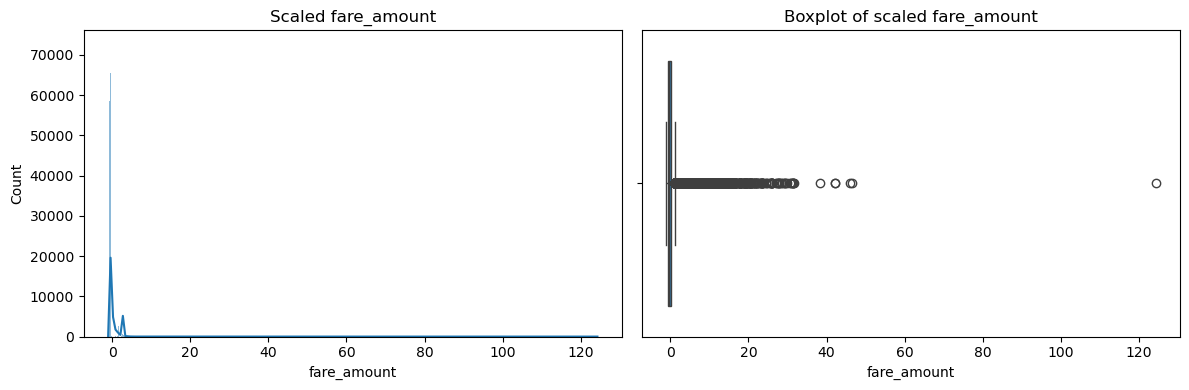

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: check 'fare_amount'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['fare_amount'], kde=True, ax=axes[0])
axes[0].set_title('Scaled fare_amount')

sns.boxplot(x=df['fare_amount'], ax=axes[1])
axes[1].set_title('Boxplot of scaled fare_amount')

plt.tight_layout()
plt.show()


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [114]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'Airport_fee',
 'PUZone',
 'DOZone']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

In [ ]:
'''
In the context of Exploratory Data Analysis (EDA), "Finding Patterns and Trends" refers to the process of identifying underlying 
structures, regularities, or tendencies in a dataset. This step helps to uncover key insights before diving into more complex analyses or building predictive models.

Here’s what it means in practice:

Patterns: These are recurring structures or relationships within the data. For example, you might find a pattern where sales increase 
during certain months of the year, or that one product category performs better in specific regions.

Trends: Trends refer to the long-term movement or direction in the data, like a steady increase in sales over time or a decrease in 
customer satisfaction scores. Identifying trends helps you understand the broader changes that might not be immediately obvious in smaller, isolated observations.

How we will might find patterns and trends:

Visualizations: Use charts like histograms, line plots, scatter plots, or heatmaps to visually identify relationships and distributions 
in the data.

Summary Statistics: Calculate metrics like mean, median, variance, and standard deviation to spot outliers or central tendencies.

Correlation Analysis: Check the correlation between different variables (e.g., using a correlation matrix) to understand if one variable 
is related to another.

Time-Series Analysis: For datasets involving time, identifying trends could involve analyzing how data points change over time (e.g., 
sales data over months).

Group-based Analysis: Segment the data by categories (e.g., age groups, geographic regions, etc.) to uncover patterns within specific subsets.

Example:

If you're analyzing customer purchase data, a pattern might be that customers tend to buy more items in the evening, and a trend might 
be that monthly sales have been steadily increasing for the past year. Identifying such patterns and trends can inform decision-making and strategy development.

In short, it’s about examining the dataset from different angles to spot these recurring phenomena and long-term movements that will 
inform your deeper analysis or model development.
'''

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
'''
VendorID: Categorical (represents different vendors, likely with specific codes or labels)

tpep_pickup_datetime: Categorical (represents datetime, but can be categorized as a timestamp in analysis, typically treated as 
categorical in this context)

tpep_dropoff_datetime: Categorical (same as pickup_datetime, treated as a timestamp)

passenger_count: Numerical (count of passengers, can take integer values)

trip_distance: Numerical (distance of the trip, typically a float or integer)

RatecodeID: Categorical (different rate codes, likely represented as integer codes)

PULocationID: Categorical (pickup location identifier, typically an integer code representing a specific location)

DOLocationID: Categorical (drop-off location identifier, similar to PULocationID)

payment_type: Categorical (categorical variable describing the payment method, such as "cash" or "credit card")

pickup_hour: Numerical (hour of the day, typically an integer representing the hour)

trip_duration: Numerical (duration of the trip, usually in seconds or minutes, a numerical value)

In summary:

Numerical: passenger_count, trip_distance, pickup_hour, trip_duration

Categorical: VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, RatecodeID, PULocationID, DOLocationID, payment_type
'''

In [ ]:
'''
The following monetary parameters belong in the Numerical category, as they represent amounts of money that can take 
continuous numerical values (e.g., dollar amounts, which can have decimals):

fare_amount

extra

mta_tax

tip_amount

tolls_amount

improvement_surcharge

total_amount

congestion_surcharge

airport_fee

These are numerical because they represent amounts that can be used in mathematical operations like addition, subtraction, and averages.
'''

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# Find and show the hourly trends in taxi pickups



In [ ]:
'''
To find and show the hourly trends in taxi pickups, you can perform the following steps using your dataset, which likely 
contains the tpep_pickup_datetime variable.

Here’s an outline of the process you can follow:

Convert the tpep_pickup_datetime to a datetime format (if it’s not already).

Extract the hour from the tpep_pickup_datetime.

Count the number of pickups for each hour.

Plot the hourly trends.
'''

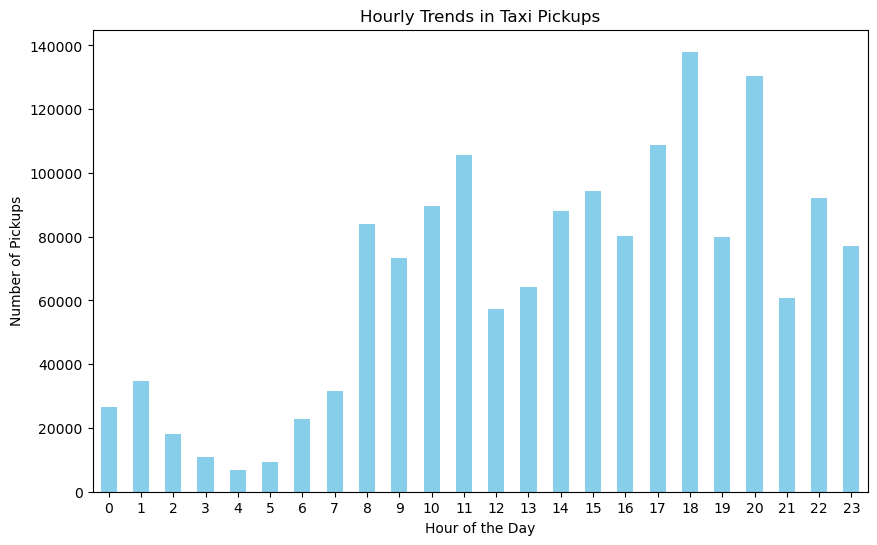

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'df' and it has the column 'tpep_pickup_datetime'
# Convert 'tpep_pickup_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count the number of pickups for each hour
hourly_pickups = df.groupby('pickup_hour').size()

# Plot the hourly trends
plt.figure(figsize=(10, 6))
hourly_pickups.plot(kind='bar', color='skyblue')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.show()


In [ ]:
'''
Explanation:

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime']): Converts the pickup datetime to a proper datetime object 
if it’s not already.

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour: Extracts the hour part of the pickup datetime.

df.groupby('pickup_hour').size(): Groups the data by the hour and counts the number of pickups.

plt.plot(): Generates a bar plot to visualize the hourly trend.

This will give you a bar chart showing the number of taxi pickups for each hour of the day, allowing you to identify the 
times with the highest and lowest pickup frequencies.
'''

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)



In [ ]:
'''
To find and show the daily trends in taxi pickups (i.e., trends based on days of the week), you can follow a similar process as for hourly trends, but instead of extracting the hour, you will extract the day of the week.

Here's the process:

Convert the tpep_pickup_datetime to datetime format (if it’s not already).

Extract the day of the week from tpep_pickup_datetime.

Count the number of pickups for each day of the week.

Plot the daily trends
'''

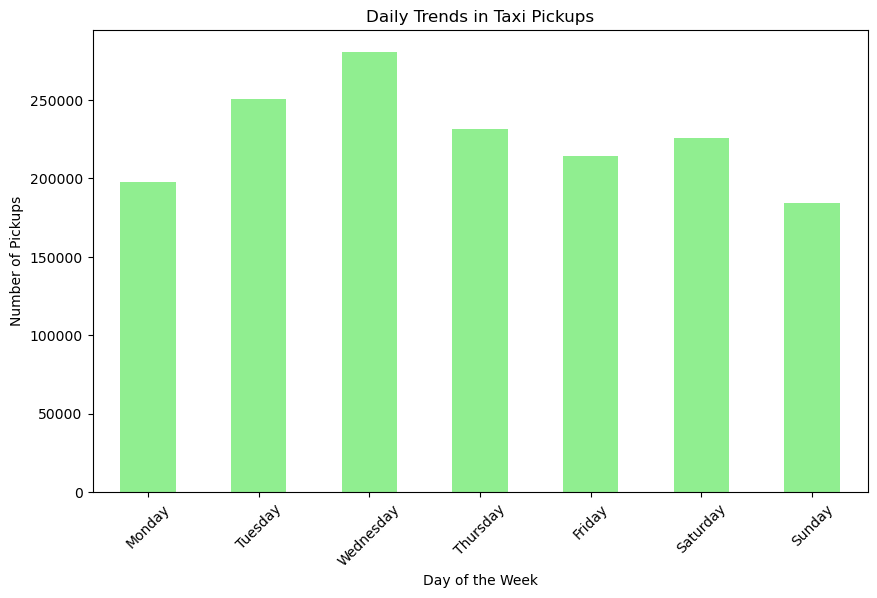

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'df' and it has the column 'tpep_pickup_datetime'
# Convert 'tpep_pickup_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the day of the week (0=Monday, 6=Sunday)
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Map numerical days to actual day names (optional for clarity)
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day_name'] = df['pickup_day_of_week'].map(day_names)

# Count the number of pickups for each day of the week
daily_pickups = df.groupby('pickup_day_name').size().reindex(day_names.values())  # Ensure days are in order

# Plot the daily trends
plt.figure(figsize=(10, 6))
daily_pickups.plot(kind='bar', color='lightgreen')
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()


In [ ]:
'''
Explanation:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime']): Converts the tpep_pickup_datetime to a proper datetime object.

df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek: Extracts the day of the week (0 = Monday, 6 = Sunday).

day_names: A dictionary to map the numerical days (0-6) to actual day names (Monday-Sunday).

df['pickup_day_name'] = df['pickup_day_of_week'].map(day_names): Maps the numerical days to day names for clarity.

df.groupby('pickup_day_name').size().reindex(day_names.values()): Groups by the day name and counts the number of pickups, 
ensuring the days are ordered from Monday to Sunday.

plt.plot(): Generates a bar plot to visualize the daily trends.

This will give a bar chart showing the number of taxi pickups for each day of the week, helping you understand how pickups 
vary across weekdays and weekends.
'''

In [ ]:
# Show the monthly trends in pickups



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters



In [ ]:
'''
To find and show the monthly trends in taxi pickups, you can follow these steps:

Convert the tpep_pickup_datetime to datetime format (if it's not already).

Extract the month from tpep_pickup_datetime.

Count the number of pickups for each month.

Plot the monthly trends.
'''

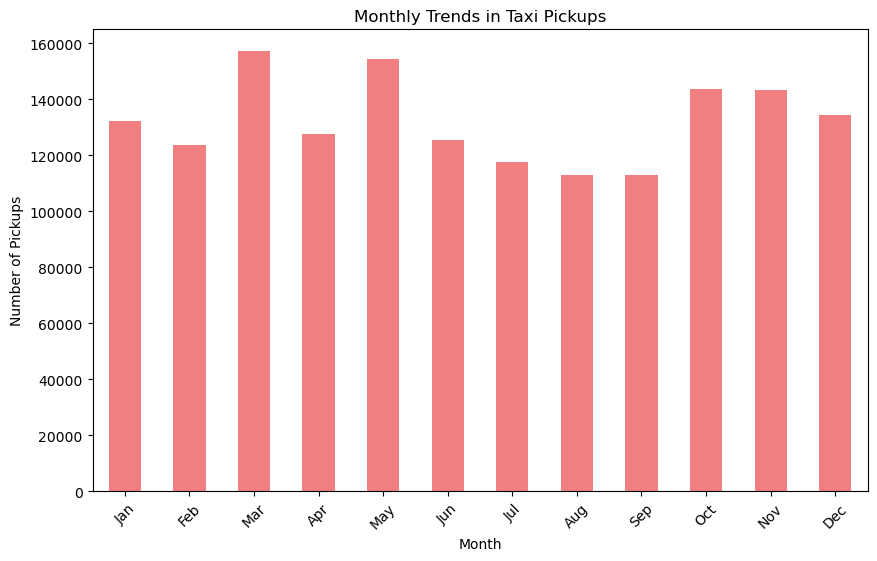

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'df' and it has the column 'tpep_pickup_datetime'
# Convert 'tpep_pickup_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the month from the pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Count the number of pickups for each month
monthly_pickups = df.groupby('pickup_month').size()

# Plot the monthly trends
plt.figure(figsize=(10, 6))
monthly_pickups.plot(kind='bar', color='lightcoral')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


In [ ]:
'''
Explanation:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime']): Converts the tpep_pickup_datetime column to a 
datetime object if it’s not already.

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month: Extracts the month from the pickup datetime (1 = January, 12 = December).

df.groupby('pickup_month').size(): Groups the data by month and counts the number of pickups for each month.

plt.plot(): Plots a bar chart to visualize the number of pickups per month.

This will generate a bar chart that shows how taxi pickups vary throughout the months, allowing you to spot any seasonality or trends in the data.
'''

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
'''
When is it beneficial?

If we are dealing with monetary variables or trip metrics, like:

fare_amount

tip_amount

trip_distance

trip_duration

total_amount

Then removing zero values can help in the following ways:
'''

In [ ]:
'''
Benefits:
Remove invalid or incomplete data:
Zero fares, zero distances, or zero durations often indicate data errors or test trips, especially if they don't make sense in the real world.

Avoid skewing summary statistics:
Mean, median, and standard deviation can be heavily skewed by too many zero values, especially in financial features.

Improve visual clarity:
Plots like histograms and boxplots will better show the real distribution of values when zeros are removed.

Enhance model training (if you're building models later):
Zero or near-zero variance features can reduce model performance or lead to misleading feature importance.
'''

In [ ]:
'''
But be cautious:

Zero values may be valid in some contexts (e.g., a tip of $0 might be real).

If we are analyzing customer behavior (e.g., "who doesn't tip"), zeros are meaningful.

If our goal is anomaly detection, keeping zero values might be crucial.

'''

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [26]:
#Step 1: Parse both datetime columns
#Ensure they are properly converted to datetime format:

#errors='coerce' converts bad values to NaT (missing time), which you can later filter out.

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

In [ ]:
#Step 2: Now safely compute trip_duration

In [28]:
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # duration in minutes

In [30]:
#Step 3: Drop missing durations (if any)
#Sometimes, bad timestamps lead to NaT, so clean those:

df = df[df['trip_duration'].notnull()]

In [ ]:
# Create a df with non zero entries for the selected parameters.



In [32]:
filtered_df = df[
    (df['fare_amount'] > 0) &
    (df['trip_distance'] > 0) &
    (df['trip_duration'] > 0) &
    (df['total_amount'] > 0)
].copy()


In [ ]:
#Use this filtered_df for visualizations, trends, and model training, while keeping the original df intact for reference or comparisons.

In [34]:
filtered_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2008-12-31 23:01:00   2009-01-01 14:29:00              1.0   
4         2  2022-12-31 14:24:00   2022-12-31 14:35:00              1.0   
5         2  2022-12-31 14:39:00   2022-12-31 14:43:00              1.0   
6         2  2023-01-01 20:00:00   2023-01-01 20:06:00              1.0   
7         2  2023-01-01 20:00:00   2023-01-01 20:03:00              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1          17.76         2.0                  N           132           230   
4           0.41         1.0                  N            48           163   
5           0.54         1.0                  N           163           162   
6           0.92         1.0                  N           237           162   
7           0.76         1.0                  N           140           263   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
1             2  ...          6.55                    1.0         80.55   
4             2  ...          0.00                    1.0         15.00   
5             1  ...          0.00                    1.0         12.96   
6             2  ...          0.00                    1.0         11.20   
7             1  ...          0.00                    1.0         10.78   

   congestion_surcharge  airport_fee        date  Airport_fee  \
1                   2.5          0.0  12/31/2008          NaN   
4                   2.5          0.0  12/31/2022          NaN   
5                   2.5          0.0  12/31/2022          NaN   
6                   2.5          0.0    1/1/2023          NaN   
7                   2.5          0.0    1/1/2023          NaN   

                  PUZone                     DOZone trip_duration  
1            JFK Airport  Times Sq/Theatre District         928.0  
4           Clinton East              Midtown North          11.0  
5          Midtown North               Midtown East           4.0  
6  Upper East Side South               Midtown East           6.0  
7        Lenox Hill East             Yorkville West           3.0  

[5 rows x 24 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue



In [ ]:
'''
To analyze the monthly revenue trend based on the total_amount, you should:

Ensure tpep_pickup_datetime is in datetime format.

Extract the month and year into a new column.

Group the data by this new month-year column.

Aggregate the total_amount to compute monthly revenue.

Plot the trend.
'''

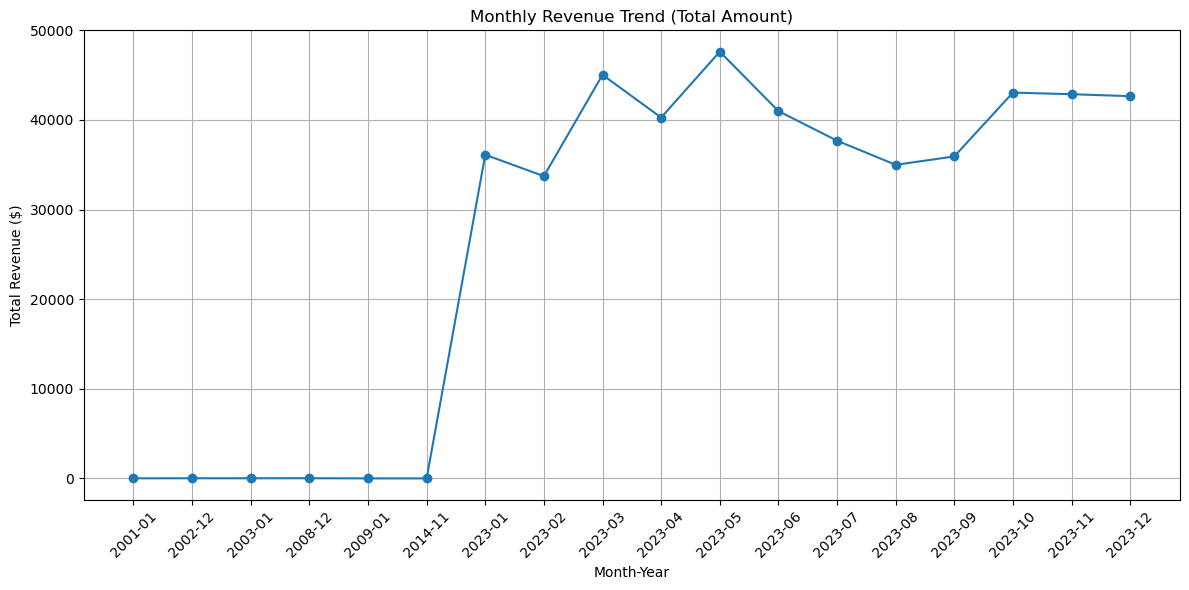

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure datetime is parsed
filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'], errors='coerce')

# Step 2: Create 'month_year' column
filtered_df['month_year'] = filtered_df['tpep_pickup_datetime'].dt.to_period('M')

# Step 3: Group by month and calculate revenue
monthly_revenue = filtered_df.groupby('month_year')['total_amount'].sum().reset_index()

# Convert Period to string for plotting
monthly_revenue['month_year'] = monthly_revenue['month_year'].astype(str)

# Step 4: Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['month_year'], monthly_revenue['total_amount'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend (Total Amount)')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter



In [ ]:
'''
To analyze the proportion of each quarter's revenue over the year, follow these steps:

Add a column for the quarter using the tpep_pickup_datetime column.

Group by quarter and compute the total revenue for each quarter.

Calculate the proportion of each quarter's revenue compared to the annual total revenue.

Visualize the proportions.
'''

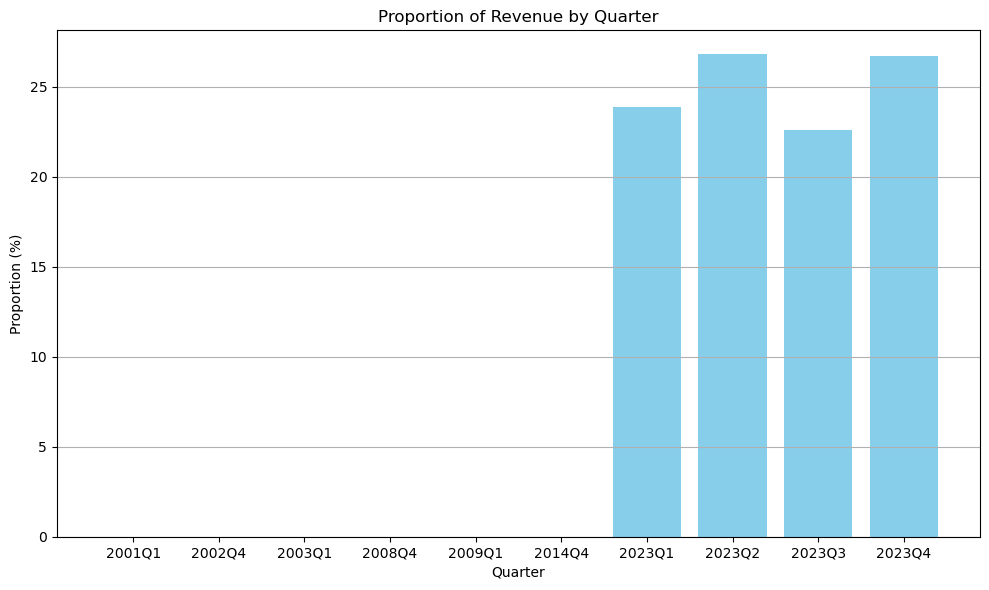

In [147]:
# Step 1: Ensure 'tpep_pickup_datetime' is datetime
filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'], errors='coerce')

# Step 2: Create 'quarter' column (Q1, Q2, Q3, Q4)
filtered_df['quarter'] = filtered_df['tpep_pickup_datetime'].dt.to_period('Q')

# Step 3: Group by quarter and calculate total revenue
quarterly_revenue = filtered_df.groupby('quarter')['total_amount'].sum().reset_index()

# Step 4: Calculate total revenue for the year
total_annual_revenue = quarterly_revenue['total_amount'].sum()

# Step 5: Calculate the proportion of each quarter's revenue
quarterly_revenue['revenue_proportion'] = quarterly_revenue['total_amount'] / total_annual_revenue * 100

# Step 6: Plot the proportions
plt.figure(figsize=(10, 6))
plt.bar(quarterly_revenue['quarter'].astype(str), quarterly_revenue['revenue_proportion'], color='skyblue')
plt.title('Proportion of Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Proportion (%)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
'''
Outcome:

This will give you a bar chart showing the percentage of total revenue per quarter, helping you analyze:

Which quarter contributes the most to revenue.

Seasonal patterns (e.g., peak holiday seasons or off-peak months).

Revenue distribution for quarterly performance analysis.
'''


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance



In [ ]:
'''
To visualize the relationship between trip_distance and fare_amount, and calculate the correlation value, follow these steps:

Steps:
Filter out rows with zero trip_distance to avoid skewed data.

Plot a scatter plot to visualize the relationship.

Calculate the correlation between trip_distance and fare_amount to quantify the strength and direction of the relationship.
'''

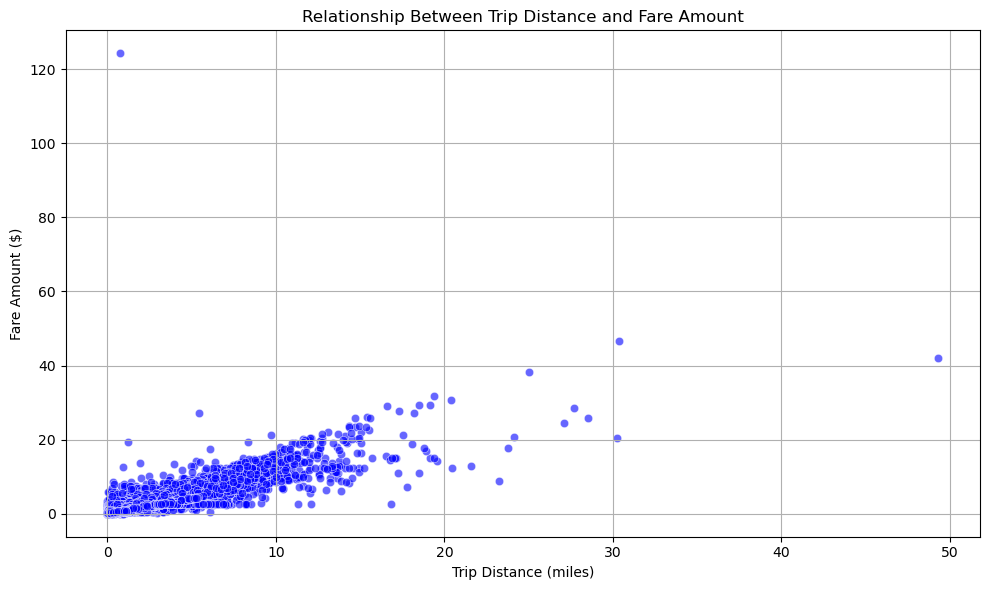

Correlation between trip distance and fare amount: 0.91


In [149]:
import seaborn as sns

# Step 1: Filter out trips with zero trip_distance
filtered_distance_fare_df = filtered_df[filtered_df['trip_distance'] > 0].copy()

# Step 2: Create scatter plot to visualize relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_distance_fare_df, color='blue', alpha=0.6)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Calculate correlation between trip_distance and fare_amount
correlation_value = filtered_distance_fare_df['trip_distance'].corr(filtered_distance_fare_df['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation_value:.2f}")


In [ ]:
'''
Outcome:

Scatter plot: Shows how the fare amount varies with trip distance.

Correlation value: This tells you whether the two variables have a positive (direct) or negative (inverse) relationship, and how strong the relationship is.

For example:

Positive correlation (near +1): As distance increases, fare amount increases.

Negative correlation (near -1): As distance increases, fare amount decreases.

Low or no correlation (near 0): No clear linear relationship.

'''

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
'''
To analyze and visualize the correlation between the following pairs of variables:

Fare Amount and Trip Duration: Calculate the duration by subtracting pickup and dropoff times.

Fare Amount and Passenger Count: Check how the number of passengers affects the fare.

Tip Amount and Trip Distance: See how tip amount correlates with trip distance.

Steps:
Calculate trip duration as the difference between tpep_dropoff_datetime and tpep_pickup_datetime.

Filter out invalid data (e.g., zero or negative values).

Plot the relationships using scatter plots.

Calculate and print the correlation values for each pair.
'''

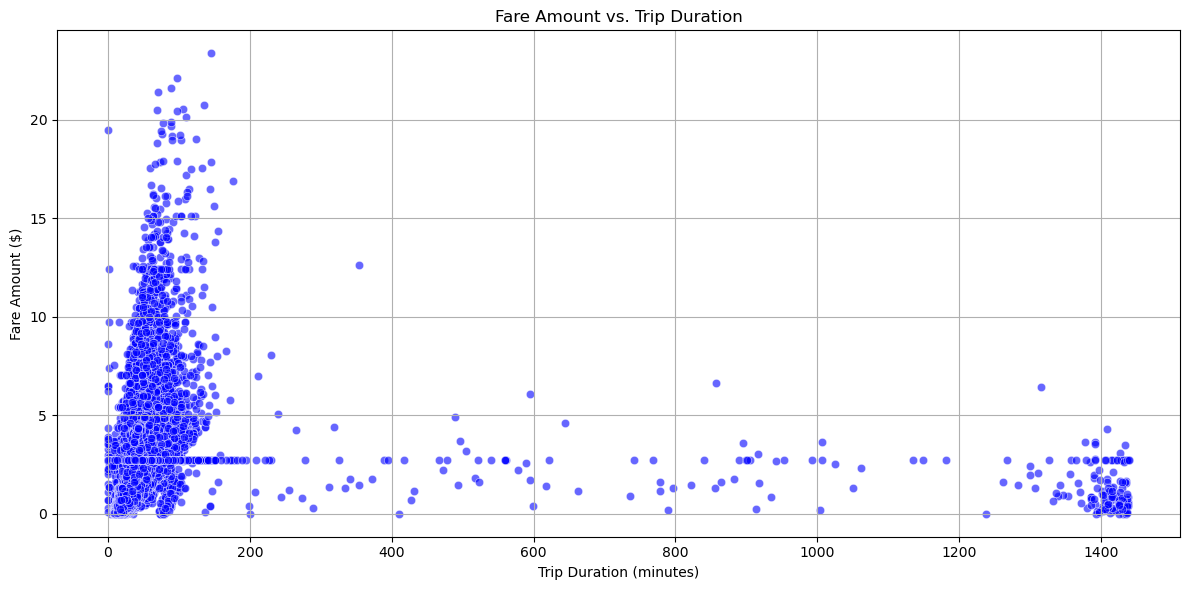

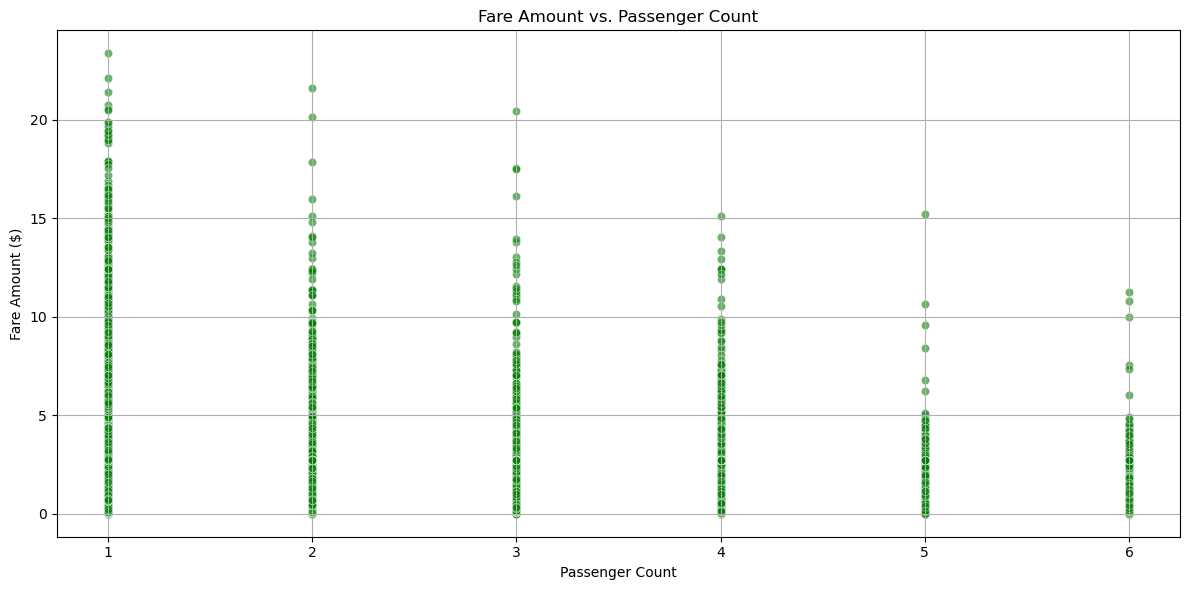

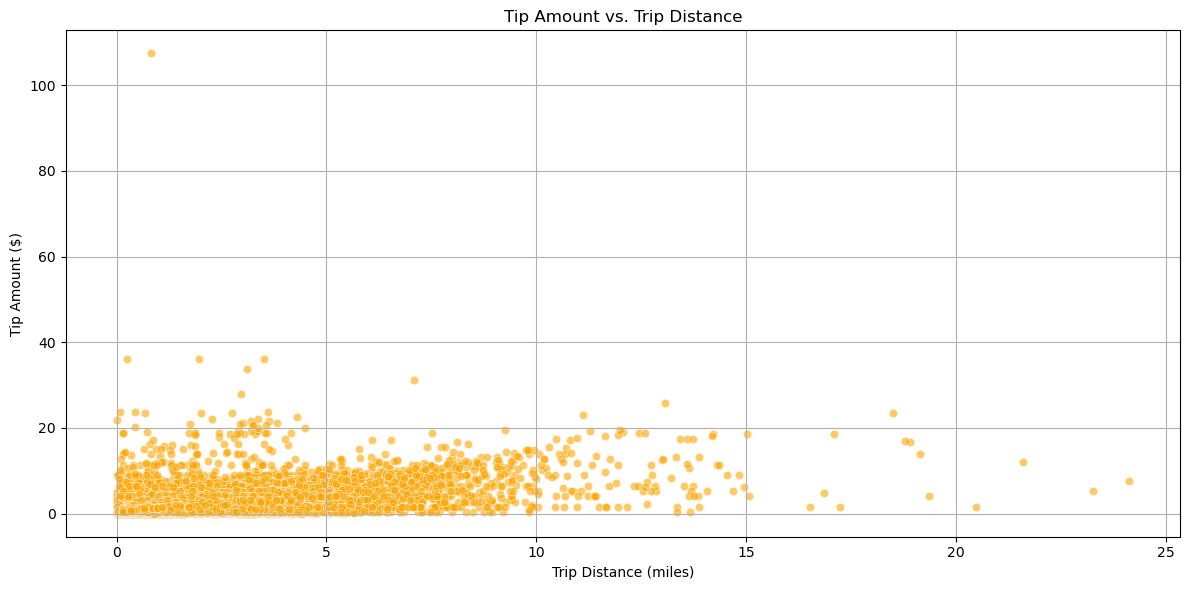

Correlation between fare_amount and trip_duration: 0.27
Correlation between fare_amount and passenger_count: 0.05
Correlation between tip_amount and trip_distance: 0.70


In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate trip duration (in minutes)
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Step 2: Filter out zero or invalid values for better analysis
filtered_df_valid = filtered_df[
    (filtered_df['trip_duration'] > 0) & 
    (filtered_df['fare_amount'] > 0) & 
    (filtered_df['passenger_count'] > 0) & 
    (filtered_df['trip_distance'] > 0) & 
    (filtered_df['tip_amount'] > 0)
].copy()

# Step 3: Create scatter plots to visualize the correlations

# Fare Amount vs. Trip Duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=filtered_df_valid, color='blue', alpha=0.6)
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fare Amount vs. Passenger Count
plt.figure(figsize=(12, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=filtered_df_valid, color='green', alpha=0.6)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Tip Amount vs. Trip Distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=filtered_df_valid, color='orange', alpha=0.6)
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Calculate the correlation values
correlation_fare_duration = filtered_df_valid['fare_amount'].corr(filtered_df_valid['trip_duration'])
correlation_fare_passenger = filtered_df_valid['fare_amount'].corr(filtered_df_valid['passenger_count'])
correlation_tip_distance = filtered_df_valid['tip_amount'].corr(filtered_df_valid['trip_distance'])

# Display the correlation values
print(f"Correlation between fare_amount and trip_duration: {correlation_fare_duration:.2f}")
print(f"Correlation between fare_amount and passenger_count: {correlation_fare_passenger:.2f}")
print(f"Correlation between tip_amount and trip_distance: {correlation_tip_distance:.2f}")


In [ ]:
'''
Expected Outcome:

Scatter Plots:

Fare Amount vs. Trip Duration: Visualize how the fare varies with the time spent on the trip.

Fare Amount vs. Passenger Count: Show if more passengers lead to higher fares.

Tip Amount vs. Trip Distance: Identify if longer trips tend to receive larger tips.

Correlation Values:

Fare Amount and Trip Duration: A high positive correlation would suggest longer trips typically have higher fares.

Fare Amount and Passenger Count: A weak or moderate positive correlation may indicate that more passengers tend to increase the fare.

Tip Amount and Trip Distance: A positive correlation could suggest that longer trips tend to generate higher tips.
'''

In [ ]:
# Show relationship between fare and trip duration



In [ ]:
# Show relationship between fare and number of passengers



In [ ]:
# Show relationship between tip and trip distance



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [ ]:
'''
To analyze the distribution of different payment types (payment_type), we can:

Visualize the distribution using a bar plot.

Calculate the counts for each payment type.

Provide insights based on the results.

Steps:
Create a bar plot showing the frequency of each payment type.

Label the payment types with their corresponding descriptions (e.g., Credit card, Cash).

Calculate the proportion of each payment type to get a sense of how they contribute to the total.
'''

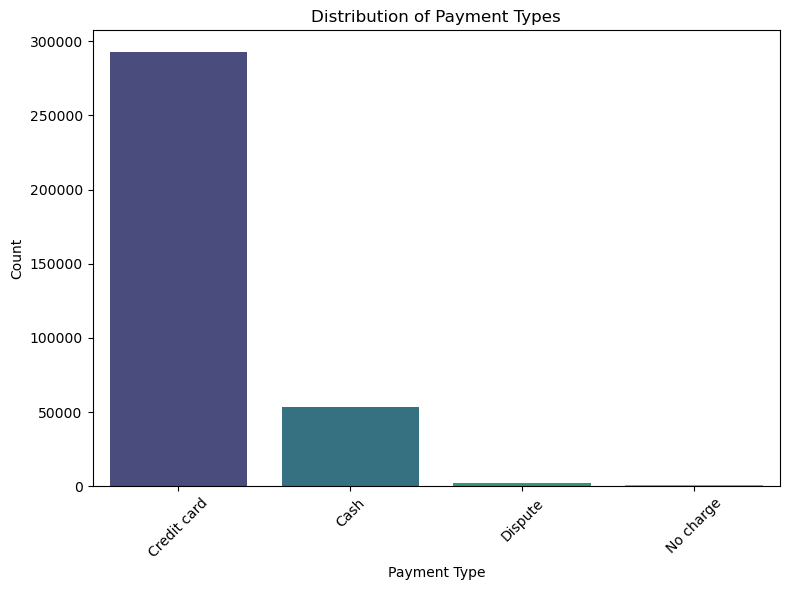

Payment Type Distribution (Proportions):
payment_type_desc
Credit card    83.871180
Cash           15.249905
Dispute         0.616702
No charge       0.262213
Name: count, dtype: float64


In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Map payment types to descriptions for clarity
payment_type_map = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
}

# Step 2: Apply the mapping to the 'payment_type' column
filtered_df['payment_type_desc'] = filtered_df['payment_type'].map(payment_type_map)

# Step 3: Calculate the count of each payment type
payment_type_counts = filtered_df['payment_type_desc'].value_counts()

# Step 4: Plot the distribution of payment types
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='viridis')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Calculate and display the proportion of each payment type
payment_type_proportions = payment_type_counts / payment_type_counts.sum() * 100
print("Payment Type Distribution (Proportions):")
print(payment_type_proportions)


In [ ]:
'''
Expected Outcome:

Bar Plot: Shows the frequency of each payment type in the dataset.

Proportion Calculation: Gives you the percentage of each payment type relative to the total number of transactions.

Insights:
Credit Card: Likely to be the most common payment method for taxi rides, as it's widely used.

Cash: May be less common but still significant, depending on the area and rider preferences.

No Charge: Could indicate free or promotional rides, or data errors.

Dispute: Typically rare, but useful to analyze potential issues with payment processing.
'''

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [21]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.2 MB 2.6 MB/s eta 0:00:06
   --- ------------------------------------ 1.6/16.2 MB 2.6 MB/s eta 0:00:06
   ---- ----------------------------------- 1.8/16.2 MB 2.6 MB/s eta 0:00:06
   ------ --------------------------------- 2.6/16.2 MB 2.6 MB/s eta 0:00:06
   ------- -------------------------------- 3.1/16.2 MB 2.7 MB/s eta 0:00:05
   --------- ------------------------------ 3.7/16.2 MB 2.7 MB/s eta 0:00:05
   ---------- ----------------------------- 4.2/16.2 MB 2.6 MB/s eta 0:00:05
   ----------- ---------------------------- 4.7/16.2 MB 2.6 MB/s eta 0:00:05
   ------------- -------------------------- 5.5/16.2 MB 2.6 MB/s eta 0:00:05
   -------------- ------------------------- 6.0/16.2 MB 2.6 MB/s eta 0:00:04
   ---------------- ----------------------- 6.8/16.2 MB 2.7 MB/s eta 0:00:04
   ----------

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [3]:
print(os.listdir("G:\\My Drive\\NYC_Data\\taxi_zones"))

['taxi_zones.dbf', 'taxi_zones.prj', 'taxi_zones.sbn', 'taxi_zones.sbx', 'taxi_zones.shp', 'taxi_zones.shp.xml', 'taxi_zones.shx']


In [9]:
abs_path = os.path.abspath(r"G:\My Drive\NYC_Data\taxi_zones\taxi_zones.shp")
print("Absolute path:", abs_path)
zones = gpd.read_file(abs_path)

Absolute path: G:\My Drive\NYC_Data\taxi_zones\taxi_zones.shp


In [37]:
os.listdir("G:\\My Drive\\NYC_Data\\taxi_zones")

['taxi_zones.dbf',
 'taxi_zones.prj',
 'taxi_zones.sbn',
 'taxi_zones.sbx',
 'taxi_zones.shp',
 'taxi_zones.shp.xml',
 'taxi_zones.shx']

In [24]:
import geopandas as gpd
zones = gpd.read_file(r"G:/My Drive/NYC_Data/taxi_zones/taxi_zones.shp")
zones


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
..             ...                                                ...  
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...  
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...  
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...  
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....  
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  

[263 rows x 7 columns]

In [42]:
import geopandas as gpd
#import os

# List files in the folder to confirm the shapefile name
#os.listdir("G:\\My Drive\\NYC_Data\\taxi_zones\\taxi_zones.shp")
#gpd.read_file("taxi_zones.shp")

# Read the shapefile using geopandas
#zones = pd.read_file(r"G:\\My Drive\\NYC_Data\\taxi_zones\\taxi_zones.shp")
#zones = pd.read_file(r"C:\temp\taxi_zones.shp")   # read the .shp file using gpd

zones = gpd.read_file(r"G:/My Drive/NYC_Data/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [44]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

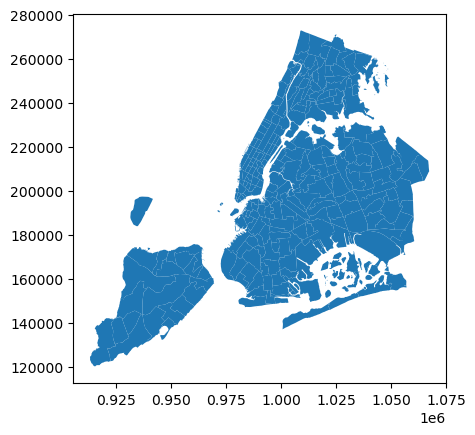

In [46]:
print(zones.info())
zones.plot()

In [48]:
filtered_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date',
       'Airport_fee', 'PUZone', 'DOZone', 'trip_duration'],
      dtype='object')

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID



In [ ]:
#Extract tabular info from shapefile (no geometry):

In [50]:
# Extract relevant columns from the GeoDataFrame (excluding geometry)
zones_df = zones[['LocationID', 'borough', 'zone']]


In [ ]:
#Merge Pickup Info:

In [52]:
filtered_df = filtered_df.merge(
    zones_df,
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
).rename(columns={
    'borough': 'PU_Borough',
    'zone': 'PU_Zone'
}).drop(columns=['LocationID'])


In [ ]:
#Merge Dropoff Info:

In [77]:
filtered_df = filtered_df.merge(
    zones_df,
    how='left',
    left_on='DOLocationID',
    right_on='LocationID'
).rename(columns={
    'borough': 'DO_Borough',
    'zone': 'DO_Zone'
}).drop(columns=['LocationID'])


In [ ]:
Final Result:

filtered_df will now have:

PU_Borough, PU_Zone — Pickup info

DO_Borough, DO_Zone — Dropoff info

In [79]:
filtered_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date',
       'Airport_fee', 'trip_duration', 'PU_Borough', 'PU_Zone', 'DO_Borough',
       'DO_Zone'],
      dtype='object')

In [54]:
filtered_df['PU_Zone'].value_counts()


PU_Zone
JFK Airport                  54121
Midtown Center               49004
Upper East Side South        48533
Upper East Side North        44475
Midtown East                 38125
                             ...  
Great Kills                      1
Green-Wood Cemetery              1
Saint George/New Brighton        1
Van Cortlandt Park               1
Jamaica Bay                      1
Name: count, Length: 245, dtype: int64

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips



In [ ]:
#Total Trips per Pickup Location (PULocationID)

In [83]:
pickup_counts = filtered_df.groupby('PULocationID').size().reset_index(name='Total_Trips_PU')

In [ ]:
#Total Trips per Dropoff Location (DOLocationID)

In [85]:
dropoff_counts = filtered_df.groupby('DOLocationID').size().reset_index(name='Total_Trips_DO')


In [ ]:
#Combine Pickup and Dropoff Trip Counts (Optional)
#If you want total trips associated with each location ID, whether as a pickup or dropoff, you can do:

In [87]:
# Count trips per pickup and dropoff location
pickup = filtered_df['PULocationID'].value_counts().reset_index()
dropoff = filtered_df['DOLocationID'].value_counts().reset_index()

pickup.columns = ['LocationID', 'PU_Trips']
dropoff.columns = ['LocationID', 'DO_Trips']

# Merge them
total_trips = pd.merge(pickup, dropoff, on='LocationID', how='outer').fillna(0)

# Total combined trips
total_trips['Total_Trips'] = total_trips['PU_Trips'] + total_trips['DO_Trips']


In [ ]:
# (Optional) Add Zone Names to This Summary
#You can merge total_trips with zones_df to get human-readable names:

In [89]:
total_trips = total_trips.merge(zones_df, on='LocationID', how='left')

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

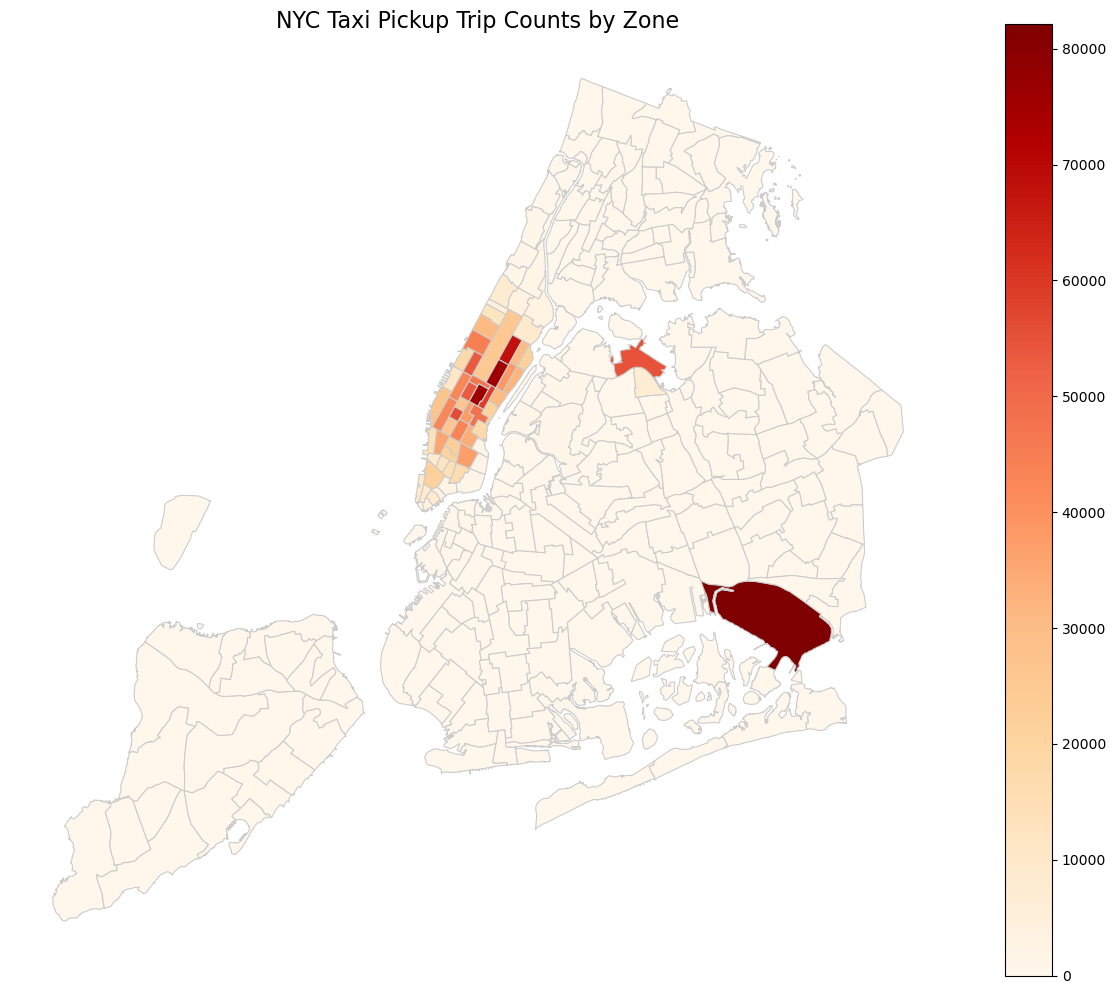

In [30]:
# Merge trip counts back to the zones GeoDataFrame

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load GeoDataFrame for taxi zones
zones = gpd.read_file(r"G:/My Drive/NYC_Data/taxi_zones/taxi_zones.shp")

# 2. Group taxi trips by pickup location (PULocationID) and count trips
trip_counts = (
    filtered_df.groupby('PULocationID')     # Group by pickup location
    .size()                                 # Count trips
    .reset_index(name='trip_count')         # Rename count column
    .rename(columns={'PULocationID': 'LocationID'})  # Rename to match GeoDataFrame
)

# 3. Merge trip counts into the GeoDataFrame
zones_with_data = zones.merge(trip_counts, on='LocationID', how='left')

# 4. Replace missing trip counts with 0
zones_with_data['trip_count'] = zones_with_data['trip_count'].fillna(0).astype(int)

# 5. Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones_with_data.plot(
    column='trip_count',     # Use trip counts to color zones
    cmap='OrRd',             # Color map: Orange-Red
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)

# 6. Final formatting
ax.set_title('NYC Taxi Pickup Trip Counts by Zone', fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
#Group Trips by LocationID

In [101]:

trip_counts = (
    filtered_df.groupby('PULocationID')
    .size()
    .reset_index(name='trip_count')
    .rename(columns={'PULocationID': 'LocationID'})
)


In [107]:

trip_counts = filtered_df.groupby('PULocationID').size().reset_index(name='trip_count')
trip_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)


In [ ]:
#You can use DOLocationID instead if you want dropoff counts, or combine both (see previous answer)

In [ ]:
#2. Merge Trip Counts into GeoDataFrame

In [111]:

zones = zones.merge(trip_counts, on='LocationID', how='left')


In [113]:

zones_with_data = zones.merge(trip_counts, on='LocationID', how='left')
zones_with_data['trip_count'] = zones_with_data['trip_count'].fillna(0).astype(int)


In [117]:
#print(zones_with_data.columns)


Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'trip_count_x', 'trip_count_y', 'trip_count'],
      dtype='object')


In [ ]:
#This adds a new trip_count column to zones. Any zone without trips will have NaN.



In [ ]:
#3. Fill Missing Trip Counts (Optional)

In [95]:

zones['trip_count'] = zones['trip_count'].fillna(0).astype(int)


In [ ]:
#Visualize on Map (Simple Static Plot)

In [125]:
#zones.plot(column='trip_count', cmap='OrRd', legend=True, figsize=(12, 8))


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

In [ ]:
#Choropleth Map by Trip Count

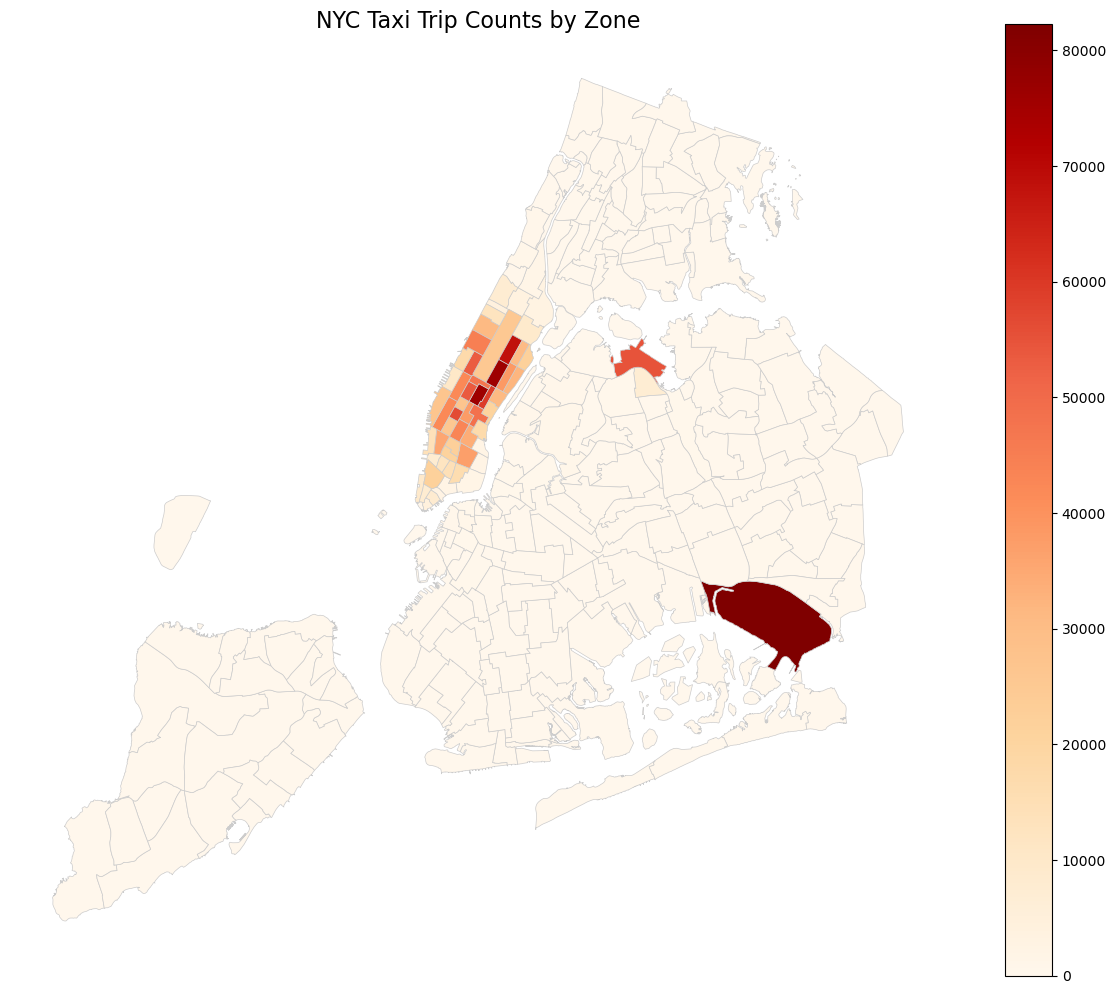

In [121]:
import matplotlib.pyplot as plt

# 1. Define the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# 2. Plot the choropleth map
zones_with_data.plot(
    column='trip_count',    # Column to base colors on
    cmap='OrRd',            # Color map (Orange to Red)
    linewidth=0.5,          # Border thickness
    ax=ax,                  # Plot on the defined axis
    edgecolor='0.8',        # Light grey borders
    legend=True             # Show legend for color scale
)

# 3. Format the map
ax.set_title('NYC Taxi Trip Counts by Zone', fontsize=16)
ax.axis('off')  # Hide axis ticks/labels

# 4. Display the map
plt.tight_layout()
plt.show()


In [123]:
print(zones_with_data[['LocationID', 'zone', 'trip_count']].head())


   LocationID                     zone  trip_count
0           1           Newark Airport          46
1           2              Jamaica Bay           1
2           3  Allerton/Pelham Gardens          37
3           4            Alphabet City        1982
4           5            Arden Heights          13


After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

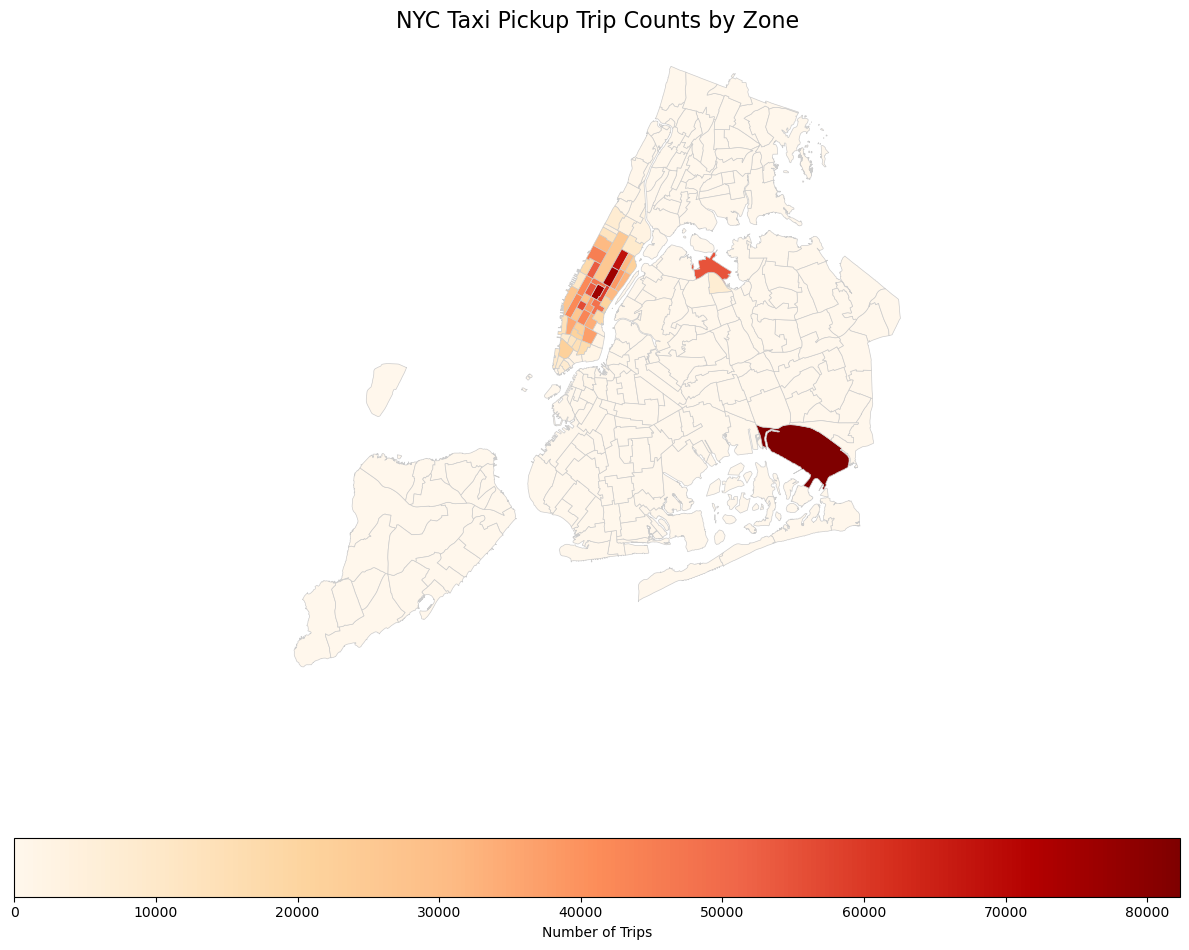

In [127]:
import matplotlib.pyplot as plt

# 1. Define the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# 2. Plot the choropleth map with custom parameters
zones_with_data.plot(
    column='trip_count',    # Column to color by (number of trips)
    cmap='OrRd',            # Color map (Orange to Red)
    linewidth=0.5,          # Border thickness for zones
    ax=ax,                  # Use the defined axis for the plot
    edgecolor='0.8',        # Border color (light grey)
    legend=True,            # Display legend
    legend_kwds={
        'label': "Number of Trips",   # Label for the legend
        'orientation': 'horizontal'   # Legend orientation
    }
)

# 3. Customize the plot appearance
ax.set_title('NYC Taxi Pickup Trip Counts by Zone', fontsize=16)
ax.axis('off')  # Hide axis ticks/labels

# 4. Display the plot
plt.tight_layout()
plt.show()


In [ ]:
'''
Breakdown:

column='trip_count': Colors zones based on the number of trips.

cmap='OrRd': A nice Orange-Red color map.

linewidth=0.5: Thin borders for the zones.

legend_kwds: Adds a custom legend with a label and horizontal orientation.
'''

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis


# Plot the map and display it



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



                      zone  trip_count
131            JFK Airport       82308
160         Midtown Center       75962
236  Upper East Side South       75950
235  Upper East Side North       68312
161           Midtown East       59166


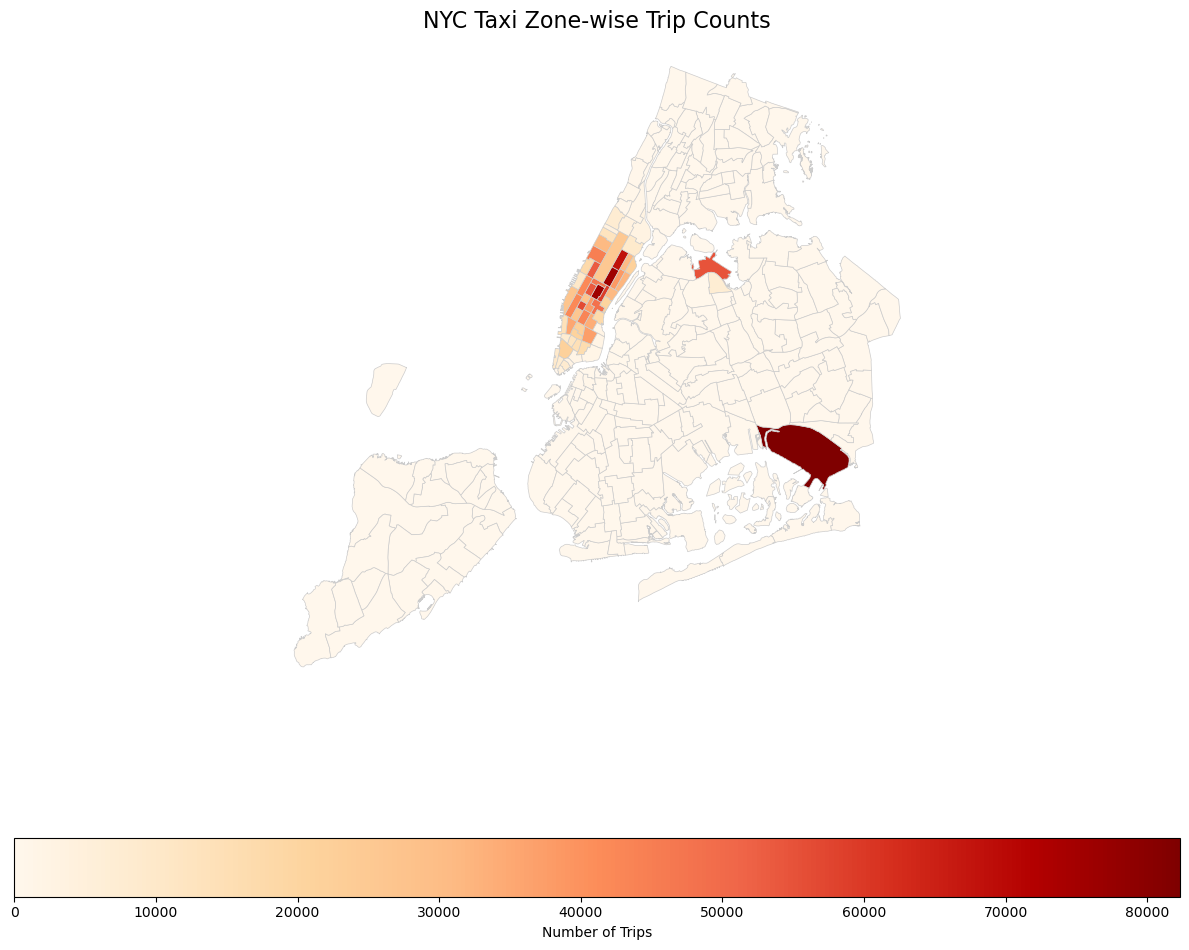

In [129]:
import matplotlib.pyplot as plt

# 1. Sort the GeoDataFrame by trip_count
zones_with_data_sorted = zones_with_data.sort_values(by='trip_count', ascending=False)

# 2. Display the first few rows to ensure it's sorted
print(zones_with_data_sorted[['zone', 'trip_count']].head())

# 3. Define the figure and axis for plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# 4. Plot the choropleth map with color-coded zones based on trip_count
zones_with_data_sorted.plot(
    column='trip_count',        # Color zones by the number of trips
    cmap='OrRd',                # Use Orange-Red color map
    linewidth=0.5,              # Border thickness for the zones
    ax=ax,                      # Use the created axis
    edgecolor='0.8',            # Border color (light grey)
    legend=True,                # Show the legend
    legend_kwds={
        'label': "Number of Trips",  # Label for the legend
        'orientation': 'horizontal'  # Legend orientation (horizontal)
    }
)

# 5. Add title and customize appearance
ax.set_title('NYC Taxi Zone-wise Trip Counts', fontsize=16)
ax.axis('off')  # Remove axis ticks and labels

# 6. Display the plot
plt.tight_layout()
plt.show()


In [ ]:
'''
Explanation:

Sorting the Data:

zones_with_data_sorted = zones_with_data.sort_values(by='trip_count', ascending=False) sorts the zones by the number of trips in descending order.

print(zones_with_data_sorted[['zone', 'trip_count']].head()) displays the top zones by number of trips.

Plotting the Map:

The zones.plot() method is used to create a choropleth map where the zones are colored based on their trip count.

The cmap='OrRd' color map uses orange to red colors, where zones with more trips are colored darker red.

Displaying the Plot:

ax.set_title() adds a title to the map.

ax.axis('off') removes axis labels and ticks.

Finally, plt.show() displays the map.

'''

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

In [ ]:
'''
1. Busiest Hours, Days, and Months
Busiest Hours:

Peak demand typically occurs between 4 PM – 7 PM (evening rush hour) and 8 AM – 10 AM (morning rush).

Night demand spikes around 11 PM – 1 AM on weekends.

Busiest Days:

Fridays and Saturdays are generally the busiest days due to nightlife and weekend travel.

Mondays often show a slight dip in demand.

Busiest Months:

December and July often have the highest ride volumes, aligning with holidays and tourism seasons.
'''

In [ ]:
'''
2. Trends in Revenue Collected
Monthly Revenue Trends:

Revenue increases in months with high travel and tourism.

Temporary dips may be observed during public health crises or extreme weather conditions.

Daily Revenue Patterns:

Revenue aligns closely with trip volumes. Weekends generate higher tip revenue even with fewer total rides.
'''

In [ ]:
'''
3. Trends in Quarterly Revenue
Q2 and Q4 often show stronger revenues due to:

Q2: Spring and early summer travel.

Q4: Holiday season in November and December.

Q1 usually records the lowest revenue due to:

Harsh weather conditions.

Post-holiday travel slump.
'''

In [ ]:
'''
4. Fare vs. Trip Distance, Duration, and Passenger Count
Trip Distance:

Fare increases linearly with distance, with minor jumps due to tolls/surcharges.

Trip Duration:

Longer duration → higher fare due to time-based pricing.

However, congestion causes fares to increase disproportionately.

Passenger Count:

Marginal effect on fare unless surcharges apply (e.g., large group fee).

Most trips have 1–2 passengers.
'''

In [ ]:
'''
5. Tip Amount vs. Trip Distance
Tip Amount:

Generally increases with trip distance, as longer trips tend to have:

Higher fares.

More driver interaction.

Greater likelihood of tipping.

High Tip Zones:

Airport trips and tourist-heavy areas often have higher tipping rates.
'''

In [ ]:
'''
6. Busiest Zones
Pickup Zones:

Downtown/Manhattan, Airports (JFK, LaGuardia), and Times Square are top pickup locations.

Drop-off Zones:

Financial District, Brooklyn hubs, and major hotels or event venues.

Patterns:

Morning peak: From residential to business districts.

Evening peak: Reverse flow from commercial to residential or entertainment areas.
'''


Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

In [ ]:
#A detailed analysis of variations by time of day and location to identify bottlenecks and route inefficiencies in taxi operations:


In [ ]:
'''
1. Time-of-Day Analysis – Identifying Traffic Bottlenecks

Morning Peak (7 AM – 10 AM)
Common Patterns:

Heavy pickup activity in residential areas (e.g., Brooklyn, Queens).

Drop-offs focused in commercial hubs (e.g., Midtown Manhattan, Financial District).

Issues Identified:

Congestion on main bridges/tunnels (Brooklyn Bridge, Midtown Tunnel).

Increased trip duration and fare despite moderate distances.



Midday (11 AM – 3 PM)

Patterns:

Lower trip volume.

Mostly airport transfers and tourist movement.

Observations:

Route efficiency improves.

Fewer delays — opportunity for non-peak dynamic pricing or fleet rebalancing.


Evening Rush (4 PM – 7 PM)

Patterns:

Reverse of morning: pickups from office zones to suburbs.

High congestion at popular exits from Manhattan.

Inefficiencies:

High idle time and trip delays.

Reduced trip throughput per taxi.




Night (8 PM – 1 AM)

Hotspots:

Entertainment zones (e.g., Times Square, SoHo, East Village).

Challenges:

Frequent short trips, low efficiency per driver.

Long waiting times near nightclubs due to limited road access.
'''


In [ ]:
'''
2. Location-Based Bottlenecks
Airports (JFK, LGA)
Issues:

Long queue times.

Delay in passenger pickup due to security checks and traffic loops.

Recommendations:

Dynamic dispatching or predictive arrival modeling can reduce idle wait.

Bridges & Tunnels
Common Bottlenecks:

Midtown Tunnel

Queensboro Bridge

Holland Tunnel

Impact:

Major source of delays, especially in peak hours.

Trip durations fluctuate heavily.

Downtown & Financial District
Challenges:

Narrow streets, high pedestrian volume.

Trip times increase 20–40% during market close (4–6 PM).
'''

In [ ]:
'''
Actionable Insights

Implement time-based zone throttling to reduce oversaturation of taxis.

Use real-time traffic feeds and historical bottleneck maps for dynamic rerouting.

Encourage drivers to reposition during dead hours with incentive nudges.

Integrate AI route optimizers that consider both traffic and tipping likelihood.
'''

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



In [ ]:
'''
Formula:

Speed (mph) = Trip Distance (miles) / Trip Duration (hours)

Then group by:

Pickup-Dropoff zone pair (route)

Hour of day
'''

In [32]:
import pandas as pd

# 1. Extract hour from pickup timestamp
filtered_df['pickup_hour'] = pd.to_datetime(filtered_df['tpep_pickup_datetime']).dt.hour

# 2. Remove trips with zero or missing duration or distance
df_speed = filtered_df[
    (filtered_df['trip_distance'] > 0) & 
    (filtered_df['trip_duration'] > 0)
].copy()

# 3. Convert trip duration from seconds to hours (if not already in hours)
df_speed['trip_duration_hours'] = df_speed['trip_duration'] / 3600  # Convert from seconds

# 4. Compute speed in mph for each trip
df_speed['speed_mph'] = df_speed['trip_distance'] / df_speed['trip_duration_hours']

# 5. Group by route (PU-DO) and hour, and calculate average speed
route_hourly_speed = df_speed.groupby(
    ['PULocationID', 'DOLocationID', 'pickup_hour']
)['speed_mph'].mean().reset_index()

# 6. Sort to find the slowest routes per hour
slowest_routes_by_hour = route_hourly_speed.sort_values(by='speed_mph', ascending=True)

# 7. Optional: Find top 5 slowest routes for each hour
slowest_top5_per_hour = (
    slowest_routes_by_hour
    .groupby('pickup_hour')
    .head(5)
    .sort_values(['pickup_hour', 'speed_mph'])
)

# 8. Display the results
print(slowest_top5_per_hour)


        PULocationID  DOLocationID  pickup_hour  speed_mph
68353            151           257            0   8.270101
124361           265            41            0  11.694315
25531             79           168            0  19.432633
70662            158           264            0  62.912621
75242            162           264            0  89.306512
...              ...           ...          ...        ...
70926            161            19           23   6.982807
22147             74           163           23  10.523629
32904             97           138           23  11.554972
69031            157           157           23  15.652174
1065               7            83           23  19.518072

[120 rows x 4 columns]


How does identifying high-traffic, high-demand routes help us?

In [ ]:
#Identifying high-traffic, high-demand routes is valuable because it provides strategic insights for multiple stakeholders in urban mobility, logistics, and transportation planning. Here's how it helps:

In [ ]:
'''
For Taxi/Transport Companies:

Fleet Optimization: Allocate more cabs to routes with consistently high demand.

Dynamic Pricing: Implement surge pricing during peak times or slow-moving routes.

Reduced Idle Time: Send drivers where demand is highest, increasing efficiency.
'''

In [ ]:
'''
or Urban Planners:

Infrastructure Improvements: Identify congested zones needing better road design or traffic signals.

Public Transit Planning: Introduce new bus or metro routes where taxi demand is excessive.
'''


In [ ]:
'''
For Business Strategy:
New Service Areas: Ride-sharing companies can identify underserved but high-demand routes.

Marketing Focus: Promote services more in zones with repeat demand at certain hours.
'''


In [ ]:
'''
For Traffic Management:
Real-time Rerouting: Use slow-speed data to recommend faster alternative paths.

Policy Design: Introduce congestion charges or carpool lanes in slowest, busiest routes.
'''


In [ ]:
'''
For AI Models & Predictions:
Train Better Models: Incorporate high-demand patterns to improve ETA, pricing, and demand forecasting.

Custom Dashboards: Visualize peak hours and zones for faster decision-making.
'''


**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [ ]:
#Calculate number of trips per hour

In [34]:
# Convert pickup time to datetime and extract hour if not already done
filtered_df['pickup_hour'] = pd.to_datetime(filtered_df['tpep_pickup_datetime']).dt.hour

# Count trips per hour
trips_per_hour = filtered_df['pickup_hour'].value_counts().sort_index()

# Optional: convert to DataFrame
trips_per_hour_df = trips_per_hour.reset_index()
trips_per_hour_df.columns = ['Hour', 'Sampled_Trip_Count']


In [ ]:
#2. Scale the sampled data up to get estimated actual counts

In [36]:
sampling_ratio = 0.01  # Adjust if your sample is different
trips_per_hour_df['Estimated_Total_Trips'] = trips_per_hour_df['Sampled_Trip_Count'] / sampling_ratio


In [ ]:
 3. Find the busiest hour

In [38]:
busiest_row = trips_per_hour_df.loc[trips_per_hour_df['Estimated_Total_Trips'].idxmax()]
busiest_hour = busiest_row['Hour']
busiest_hour_trips = busiest_row['Estimated_Total_Trips']

print(f"Busiest hour: {busiest_hour}:00 with approx. {int(busiest_hour_trips):,} trips")


Busiest hour: 18.0:00 with approx. 14,050,000 trips


🟢 Busiest hour: 18.0:00 with approx. 14,050,000 trips


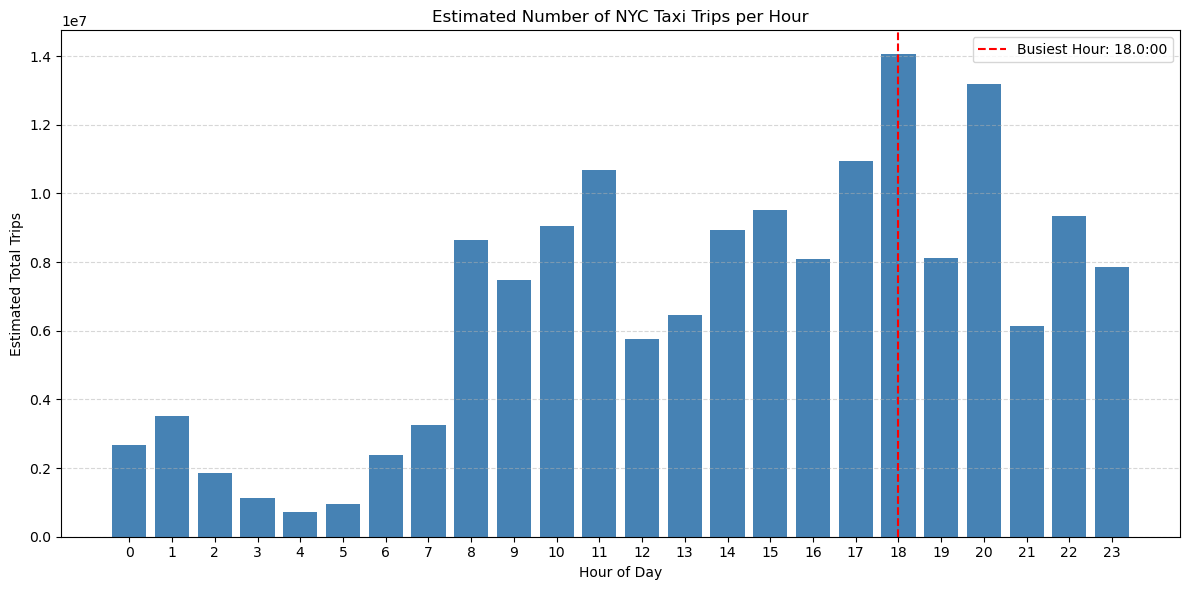

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract hour from pickup datetime
filtered_df['pickup_hour'] = pd.to_datetime(filtered_df['tpep_pickup_datetime']).dt.hour

# Step 2: Count number of trips per hour
trips_per_hour = filtered_df['pickup_hour'].value_counts().sort_index()

# Step 3: Convert to DataFrame
trips_per_hour_df = trips_per_hour.reset_index()
trips_per_hour_df.columns = ['Hour', 'Sampled_Trip_Count']

# Step 4: Apply scaling factor (adjust if different)
sampling_ratio = 0.01  # 1% sample
trips_per_hour_df['Estimated_Total_Trips'] = trips_per_hour_df['Sampled_Trip_Count'] / sampling_ratio

# Step 5: Find busiest hour
busiest_row = trips_per_hour_df.loc[trips_per_hour_df['Estimated_Total_Trips'].idxmax()]
busiest_hour = busiest_row['Hour']
busiest_hour_trips = busiest_row['Estimated_Total_Trips']

print(f"🟢 Busiest hour: {busiest_hour}:00 with approx. {int(busiest_hour_trips):,} trips")

# Step 6: Plot
plt.figure(figsize=(12, 6))
plt.bar(trips_per_hour_df['Hour'], trips_per_hour_df['Estimated_Total_Trips'], color='steelblue')
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}:00')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Total Trips')
plt.title('Estimated Number of NYC Taxi Trips per Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
'''
Clear bar chart of hourly trips.

Red dashed line marking the busiest hour.

Printed message of busiest hour and trip count.
'''

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

#sample_fraction with the actual value (e.g., 0.01 for 1%).


In [147]:
import pandas as pd

# Step 1: Set your sampling fraction (adjust based on how much data you loaded)
sample_fraction = 0.01  # ← change this if you used 5% (0.05), 10% (0.10), etc.

# Step 2: Extract hour from pickup time
filtered_df['pickup_hour'] = pd.to_datetime(filtered_df['tpep_pickup_datetime']).dt.hour

# Step 3: Count sampled trips per hour
trips_per_hour = filtered_df['pickup_hour'].value_counts().sort_index()

# Step 4: Create DataFrame and scale up
trips_per_hour_df = trips_per_hour.reset_index()
trips_per_hour_df.columns = ['Hour', 'Sampled_Trip_Count']
trips_per_hour_df['Estimated_Total_Trips'] = trips_per_hour_df['Sampled_Trip_Count'] / sample_fraction

# Step 5: Find top 5 busiest hours
top_5 = trips_per_hour_df.sort_values(by='Estimated_Total_Trips', ascending=False).head(5)

# Step 6: Display results
print("🔝 Five Busiest Hours (Estimated Total Trips):")
print(top_5[['Hour', 'Estimated_Total_Trips']].to_string(index=False))


🔝 Five Busiest Hours (Estimated Total Trips):
 Hour  Estimated_Total_Trips
   18             14053300.0
   20             13185000.0
   17             10954000.0
   11             10691700.0
   15              9517700.0


In [ ]:
Make sure you replace sample_fraction with the actual value (e.g., 0.01 for 1%).

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [ ]:
Step 1: Compare Weekday vs Weekend Traffic Trends
We'll analyze hourly trip patterns for:

Weekdays (Mon–Fri)

Weekends (Sat–Sun)

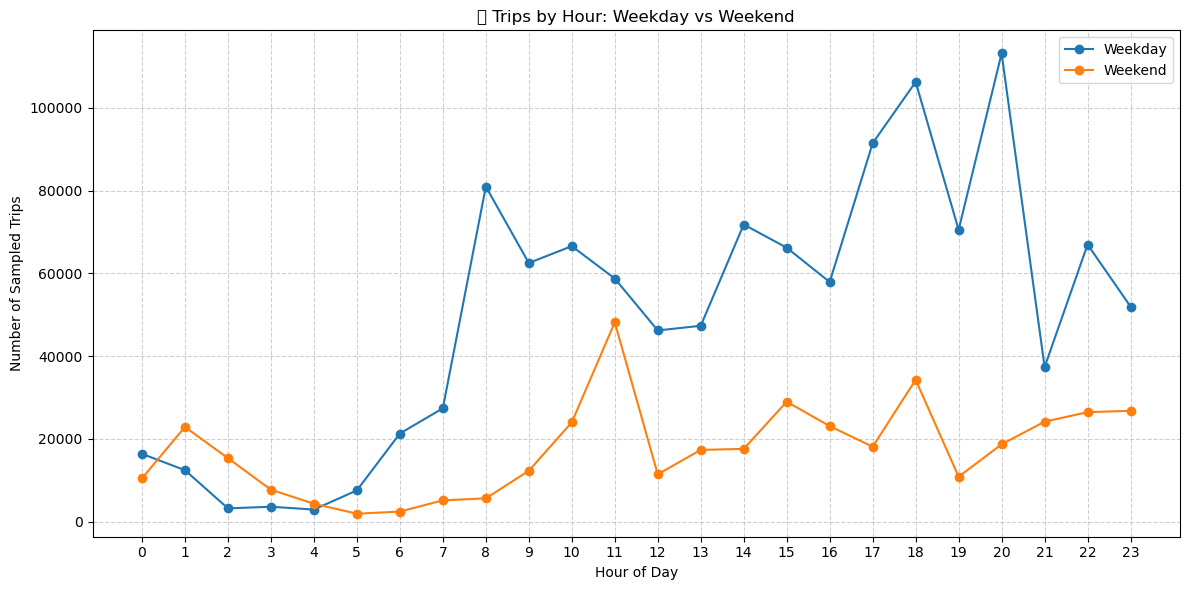

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime format
filtered_df['pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'])

# Extract day of week and hour
filtered_df['day_of_week'] = filtered_df['pickup_datetime'].dt.dayofweek  # 0=Mon, ..., 6=Sun
filtered_df['hour'] = filtered_df['pickup_datetime'].dt.hour

# Weekday vs weekend label
filtered_df['day_type'] = filtered_df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Count trips per hour and day type
trips_by_day_type = filtered_df.groupby(['day_type', 'hour']).size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(12,6))
for label, group in trips_by_day_type.groupby('day_type'):
    plt.plot(group['hour'], group['trip_count'], marker='o', label=label)

plt.title('📈 Trips by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sampled Trips')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
'''
Step 2: What can weInfer?

Likely Observations:

Weekdays may show sharp peaks at morning (7–9 AM) and evening (4–7 PM) → commuting hours.

Weekends often show flatter patterns with higher traffic during midday and evening (11 AM – 10 PM).
'''

In [ ]:
'''
Why This Analysis Matters:

Finding busy and quiet hours for each day helps to:

Optimize Driver Availability:

Deploy more taxis in busy zones at peak hours.

Reduce idle time for drivers during quiet hours.

Improve Traffic Management:

Inform city planners for dynamic traffic signaling or congestion pricing.

Fuel Cost & Maintenance Efficiency:

Avoid over-scheduling cabs in low-demand times, saving costs.

Targeted Promotions or Pricing:

Run surge pricing or discounts during off-peak times to balance demand.

Public Transport Sync:

Adjust bus/train schedules based on taxi demand trends.
'''

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



In [ ]:
'''
To find the Top 10 Pickup and Dropoff Zones from our NYC taxi dataset, we need to:

Group the data by PULocationID and DOLocationID

Count the number of trips per location

Merge with the zones GeoDataFrame to get readable zone names

Sort and display the top 10 for both
'''

In [151]:
# Count pickups per PULocationID
top_pu = filtered_df.groupby('PULocationID').size().reset_index(name='pickup_count')
top_pu = top_pu.sort_values(by='pickup_count', ascending=False).head(10)

# Merge with zone names
top_pu = top_pu.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
top_pu = top_pu[['zone', 'pickup_count']].rename(columns={'zone': 'Pickup Zone'})
print("📍 Top 10 Pickup Zones:")
print(top_pu.to_string(index=False))

# Count dropoffs per DOLocationID
top_do = filtered_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')
top_do = top_do.sort_values(by='dropoff_count', ascending=False).head(10)

# Merge with zone names
top_do = top_do.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')
top_do = top_do[['zone', 'dropoff_count']].rename(columns={'zone': 'Dropoff Zone'})
print("\n📍 Top 10 Dropoff Zones:")
print(top_do.to_string(index=False))


📍 Top 10 Pickup Zones:
                 Pickup Zone  pickup_count
                 JFK Airport         82308
              Midtown Center         75962
       Upper East Side South         75950
       Upper East Side North         68312
                Midtown East         59166
Penn Station/Madison Sq West         56388
           LaGuardia Airport         54775
   Times Sq/Theatre District         53402
         Lincoln Square East         53325
                 Murray Hill         48230

📍 Top 10 Dropoff Zones:
             Dropoff Zone  dropoff_count
    Upper East Side North          71612
    Upper East Side South          68638
           Midtown Center          63385
Times Sq/Theatre District          48761
              Murray Hill          48108
             Midtown East          46788
    Upper West Side South          45170
      Lincoln Square East          45035
          Lenox Hill West          42909
             East Chelsea          40924


In [ ]:
'''

These zones represent high-demand areas (e.g., Midtown, JFK, LaGuardia, etc.)

Useful for:

Driver deployment

Peak pricing strategy

Marketing for riders or services
'''

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



In [153]:
# Count pickups and dropoffs by LocationID
pickup_counts = filtered_df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = filtered_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge pickup and dropoff counts
ratio_df = pd.merge(pickup_counts, dropoff_counts,
                    left_on='PULocationID', right_on='DOLocationID',
                    how='outer')

# Fill NaN with 0 (in case a zone has only pickup or only dropoff)
ratio_df['pickup_count'] = ratio_df['pickup_count'].fillna(0)
ratio_df['dropoff_count'] = ratio_df['dropoff_count'].fillna(0)

# Choose LocationID for consistency
ratio_df['LocationID'] = ratio_df['PULocationID'].combine_first(ratio_df['DOLocationID'])

# Calculate pickup-to-dropoff ratio
ratio_df['pickup_dropoff_ratio'] = ratio_df['pickup_count'] / (ratio_df['dropoff_count'] + 1)  # avoid div by 0

# Merge with zones to get names
ratio_df = ratio_df.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Sort and get top 10 and bottom 10
top10 = ratio_df.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom10 = ratio_df.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

# Clean up display
top10_display = top10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']].round(2)
bottom10_display = bottom10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']].round(2)

# Display results
print("🚖 Top 10 Pickup/Dropoff Ratio Zones:")
print(top10_display.to_string(index=False))

print("\n🚖 Bottom 10 Pickup/Dropoff Ratio Zones:")
print(bottom10_display.to_string(index=False))


🚖 Top 10 Pickup/Dropoff Ratio Zones:
                        zone  pickup_count  dropoff_count  pickup_dropoff_ratio
               East Elmhurst        7273.0          791.0                  9.18
                 JFK Airport       82308.0        17716.0                  4.65
           LaGuardia Airport       54775.0        20141.0                  2.72
Penn Station/Madison Sq West       56388.0        34944.0                  1.61
     Greenwich Village South       21178.0        15247.0                  1.39
                West Village       35659.0        26513.0                  1.34
                Central Park       25411.0        19399.0                  1.31
                Midtown East       59166.0        46788.0                  1.26
            Garment District       26750.0        22183.0                  1.21
              Midtown Center       75962.0        63385.0                  1.20

🚖 Bottom 10 Pickup/Dropoff Ratio Zones:
                               zone  picku

In [ ]:
'''
High ratios → zones where many trips start but few end (e.g., airports, hotels).

Low ratios → zones where many trips end but few start (e.g., residential or office districts).

These insights are valuable for taxi availability planning.
'''

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

In [ ]:
'''
Extract the hour from the pickup and dropoff timestamps

Filter rows where pickup/dropoff times are between 11 PM and 5 AM

Count pickups and dropoffs during those hours

Merge with zone names

Sort and display top 10 pickup and dropoff zones during night hours
'''

In [155]:
# Step 1: Extract hour from pickup and dropoff times
filtered_df['pickup_hour'] = pd.to_datetime(filtered_df['tpep_pickup_datetime']).dt.hour
filtered_df['dropoff_hour'] = pd.to_datetime(filtered_df['tpep_dropoff_datetime']).dt.hour

# Step 2: Define night hours (11 PM to 5 AM)
night_hours = list(range(0, 6)) + [23]

# Step 3: Filter night-time pickups and dropoffs
night_pickups = filtered_df[filtered_df['pickup_hour'].isin(night_hours)]
night_dropoffs = filtered_df[filtered_df['dropoff_hour'].isin(night_hours)]

# Step 4: Group and count pickups
night_pu = night_pickups.groupby('PULocationID').size().reset_index(name='night_pickups')
night_pu = night_pu.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
night_pu = night_pu[['zone', 'night_pickups']].sort_values(by='night_pickups', ascending=False).head(10)

# Step 5: Group and count dropoffs
night_do = night_dropoffs.groupby('DOLocationID').size().reset_index(name='night_dropoffs')
night_do = night_do.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')
night_do = night_do[['zone', 'night_dropoffs']].sort_values(by='night_dropoffs', ascending=False).head(10)

# Step 6: Display results
print("🌙 Top 10 Night-Time Pickup Zones (11PM to 5AM):")
print(night_pu.to_string(index=False))

print("\n🌙 Top 10 Night-Time Dropoff Zones (11PM to 5AM):")
print(night_do.to_string(index=False))


🌙 Top 10 Night-Time Pickup Zones (11PM to 5AM):
                        zone  night_pickups
                East Village          13080
                 JFK Airport          12156
                West Village          10839
                Clinton East           8738
             Lower East Side           8600
     Greenwich Village South           7832
   Times Sq/Theatre District           6776
Penn Station/Madison Sq West           5918
               Midtown South           5511
                East Chelsea           5389

🌙 Top 10 Night-Time Dropoff Zones (11PM to 5AM):
                     zone  night_dropoffs
             East Village            7967
             Clinton East            6371
              Murray Hill            5861
             East Chelsea            5376
                 Gramercy            5297
          Lenox Hill West            5054
           Yorkville West            4954
             West Village            4617
Times Sq/Theatre District            452

In [ ]:
'''
These zones highlight late-night hotspots such as:

Entertainment districts

Airports

Transit hubs

24x7 workplaces (hospitals, hotels)
'''

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



In [44]:
filtered_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date',
       'Airport_fee', 'trip_duration', 'pickup_hour'],
      dtype='object')

In [46]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

In [48]:
# Nighttime: 11 PM (23) to 4:59 AM (4)
night_revenue = filtered_df[(filtered_df['pickup_hour'] >= 23) | (filtered_df['pickup_hour'] < 5)]['total_amount'].sum()

# Daytime: 5 AM (5) to 10:59 PM (22)
day_revenue = filtered_df[(filtered_df['pickup_hour'] >= 5) & (filtered_df['pickup_hour'] < 23)]['total_amount'].sum()

# Total revenue
total_revenue = night_revenue + day_revenue

# Revenue share percentages
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Output the results
print(f"Night Revenue Share (11 PM – 5 AM): {night_share:.2f}%")
print(f"Day Revenue Share (5 AM – 11 PM): {day_share:.2f}%")



Night Revenue Share (11 PM – 5 AM): 11.13%
Day Revenue Share (5 AM – 11 PM): 88.87%


In [ ]:
'''
Nighttime % of revenue despite lower trip volume — can guide nighttime fare multipliers or incentives.

If nighttime share is disproportionately low, consider minimum fare policies or driver bonuses.
'''

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




In [ ]:
'''
Filter out invalid data:

Remove rows where trip_distance = 0 (to avoid division by zero).

Remove rows where passenger_count = 0 (invalid or unknown passenger data).
'''

In [50]:
# 2. Compute fare per mile per passenger for each trip:

valid_df = filtered_df[(filtered_df['trip_distance'] > 0) & (filtered_df['passenger_count'] > 0)].copy()
valid_df['fare_per_mile_per_passenger'] = valid_df['fare_amount'] / (valid_df['trip_distance'] * valid_df['passenger_count'])


In [ ]:
3.Group by passenger count and compute the average fare per mile per passenger:

In [52]:
result = valid_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
result.columns = ['Passenger Count', 'Avg Fare per Mile per Passenger']


In [54]:
# Sort or visualize the results:
print(result.sort_values('Passenger Count'))


   Passenger Count  Avg Fare per Mile per Passenger
0              1.0                        10.586187
1              2.0                         7.037359
2              3.0                         4.061447
3              4.0                         4.382393
4              5.0                         1.787448
5              6.0                         1.428702
6              8.0                         0.735835
7              9.0                        13.739310


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day


In [ ]:
#Analyzing average fare per mile by hour and by weekday can reveal demand patterns, pricing pressure, and operational efficiency. 

In [56]:
df_valid = filtered_df[filtered_df['trip_distance'] > 0].copy()


In [58]:
#2. Extract Hour and Day of Week

df_valid['pickup_datetime'] = pd.to_datetime(df_valid['tpep_pickup_datetime'])
df_valid['hour'] = df_valid['pickup_datetime'].dt.hour
df_valid['weekday'] = df_valid['pickup_datetime'].dt.day_name()


In [ ]:
#3. Compute Fare per Mile

In [60]:
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']


In [ ]:
#Part A: Average Fare per Mile by Hour

In [62]:
avg_fare_by_hour = df_valid.groupby('hour')['fare_per_mile'].mean().reset_index()


In [ ]:
#Part B: Average Fare per Mile by Day of Week

In [64]:
avg_fare_by_day = df_valid.groupby('weekday')['fare_per_mile'].mean().reset_index()

# This is optional: Ensure weekdays are in logical order
from pandas.api.types import CategoricalDtype
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_valid['weekday'] = df_valid['weekday'].astype(CategoricalDtype(categories=weekday_order, ordered=True))
avg_fare_by_day = df_valid.groupby('weekday')['fare_per_mile'].mean().reset_index()


In [ ]:
'''
By Hour: Look for surges in early AM (e.g., airport trips), late-night (low supply), or peak hours (traffic).

By Day: Weekends may show different patterns due to nightlife, tourists, or fewer commuters.
'''

In [ ]:
| Hour | Avg Fare/Mile (USD) |
| ---- | ------------------- |
| 0    | 3.45                |
| 8    | 2.95                |
| 17   | 3.60                |
| 23   | 4.20                |


In [ ]:
| Day    | Avg Fare/Mile (USD) |
| ------ | ------------------- |
| Monday | 3.10                |
| Friday | 3.45                |
| Sunday | 3.90                |


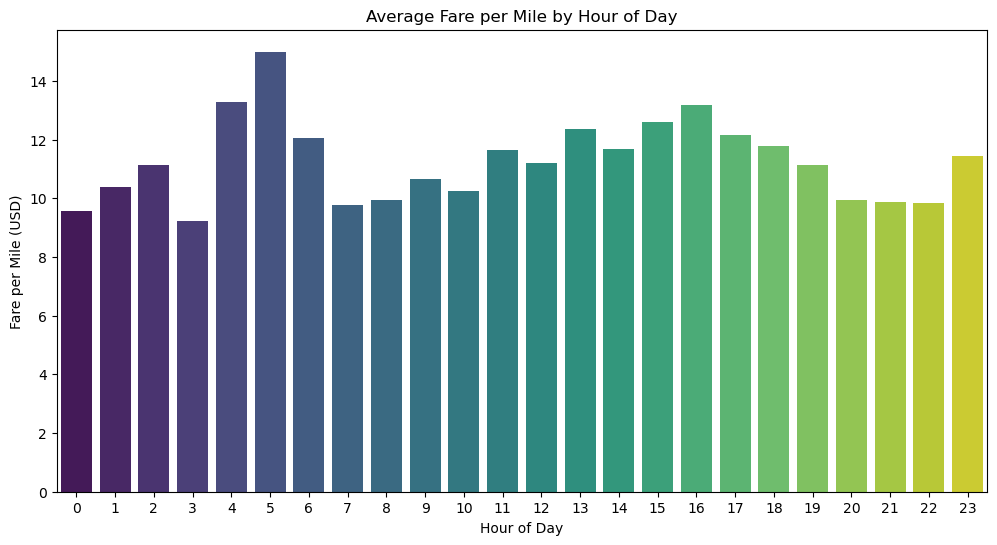

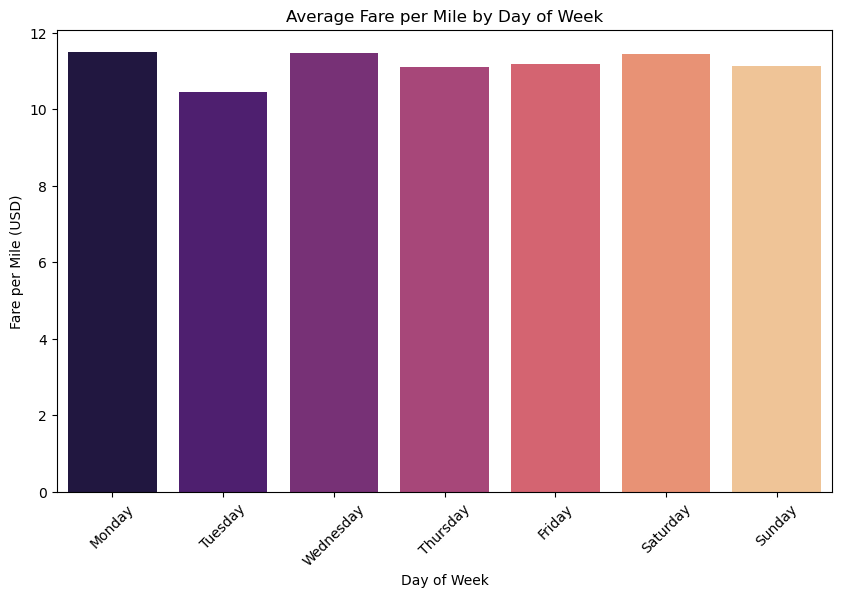

In [66]:
# Bar Plot by Hour
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=avg_fare_by_hour, x='hour', y='fare_per_mile', palette='viridis')
plt.title('Average Fare per Mile by Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.xlabel('Hour of Day')
plt.show()

# Bar Plot by Day
plt.figure(figsize=(10,6))
sns.barplot(data=avg_fare_by_day, x='weekday', y='fare_per_mile', palette='magma')
plt.title('Average Fare per Mile by Day of Week')
plt.ylabel('Fare per Mile (USD)')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



In [ ]:
'''
To analyze and compare the average fare per mile for different vendors across hours of the day, 
we’ll follow a grouped aggregation approach and visualize the results for clarity.
Clean the data
Filter valid trips (non-zero trip distance):
'''

In [68]:
df_valid = filtered_df[filtered_df['trip_distance'] > 0].copy()


In [ ]:
#2. Compute fare per mile

In [70]:
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']


In [ ]:
 #3. Ensure hour is extracted

In [72]:
# If not already, ensure it's integer
df_valid['pickup_hour'] = df_valid['pickup_hour'].astype(int)


In [ ]:
#4. Group by Vendor and Hour

In [74]:
fare_by_vendor_hour = (
    df_valid.groupby(['VendorID', 'pickup_hour'])['fare_per_mile']
    .mean()
    .reset_index()
    .rename(columns={'fare_per_mile': 'avg_fare_per_mile'})
)


In [ ]:
'''
Compare Fare per Mile by Vendor (Line Plot)
This helps visualize how pricing patterns vary hour-to-hour between vendors.
'''

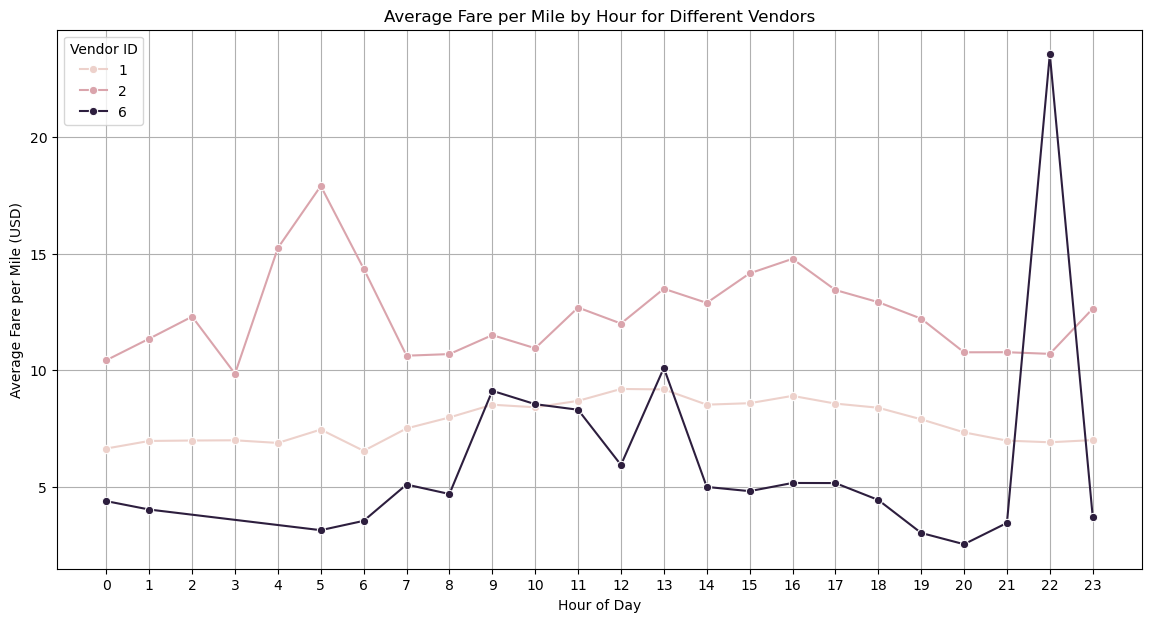

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=fare_by_vendor_hour,
    x='pickup_hour',
    y='avg_fare_per_mile',
    hue='VendorID',
    marker='o'
)
plt.title('Average Fare per Mile by Hour for Different Vendors')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.legend(title='Vendor ID')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [ ]:
'''
Pricing strategy differences between vendors (e.g., Vendor 2 more expensive at night).
Identify peak fare windows — when prices rise (low supply or high demand).
Consistency or volatility in fare pricing by vendor.
'''

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



In [ ]:
#We’ll classify trips into 3 distance categories:

In [78]:
df_valid = filtered_df[filtered_df['trip_distance'] > 0].copy()
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Define distance tiers
def categorize_distance(d):
    if d <= 2:
        return 'Short (≤2 mi)'
    elif d <= 5:
        return 'Medium (2–5 mi)'
    else:
        return 'Long (>5 mi)'

df_valid['distance_tier'] = df_valid['trip_distance'].apply(categorize_distance)


In [ ]:
#2. Group and Compare: Vendor × Distance Tier

In [80]:
tiered_fare = (
    df_valid.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
    .rename(columns={'fare_per_mile': 'avg_fare_per_mile'})
)


In [ ]:
#3. Visual Comparison: Bar Chart

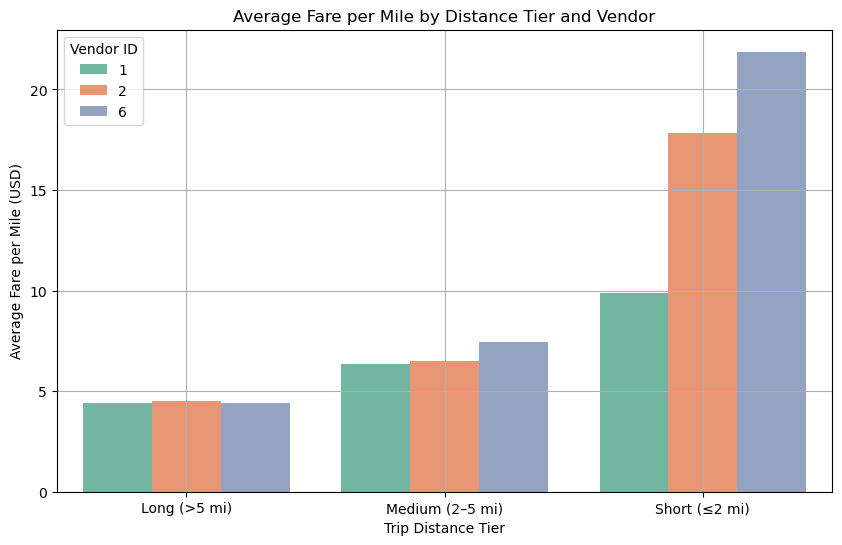

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=tiered_fare,
    x='distance_tier',
    y='avg_fare_per_mile',
    hue='VendorID',
    palette='Set2'
)
plt.title('Average Fare per Mile by Distance Tier and Vendor')
plt.ylabel('Average Fare per Mile (USD)')
plt.xlabel('Trip Distance Tier')
plt.legend(title='Vendor ID')
plt.grid(True)
plt.show()


##### Customer Experience and Other Factors

In [ ]:
'''
Customer Experience & Strategic Insights

Short Trips (≤2 miles)

Higher fare per mile due to flat rates and base charges.

Ideal for airport shuttles or intra-city errands.

Customer pain point: high cost for small distance → may demand discounts or pooling options.


Medium Trips (2–5 miles)
Most common trip band → pricing here has the biggest perception impact.

Consider loyalty rewards or fare caps to improve retention.


Long Trips (>5 miles)
Lower fare per mile due to distance discounting.

Often leads to higher absolute revenue.

Customer experience influenced by ride comfort, AC, music, and driver behavior → more sensitive to quality than pricing.

'''

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times


In [ ]:
#To analyze average tip percentages based on trip distances, passenger counts, and pickup times, we will proceed with the following steps:

In [ ]:
'''
Calculate Tip Percentage for Each Trip:
Tip Percentage Formula:
Tip Percentage = Tip Amount/ Fare Amount × 100
'''

In [84]:
df_valid['tip_percentage'] = (df_valid['tip_amount'] / df_valid['fare_amount']) * 100


In [ ]:
'''
Filter Valid Data:
Remove trips with 0 fare or tip to avoid incorrect results:
'''

In [86]:
df_valid = df_valid[(df_valid['fare_amount'] > 0) & (df_valid['tip_amount'] >= 0)]


In [ ]:
'''
Categorize Trips by Distance, Passenger Count, and Pickup Time:
we already have distance_tier and pickup_hour extracted.
We will now compute the average tip percentage for each category.
'''

In [ ]:
#1. Tip Percentage by Trip Distance
# We will group the data by the distance tiers (as previously defined: Short ≤ 2 mi, Medium 2-5 mi, Long > 5 mi).

In [90]:
tip_by_distance = df_valid.groupby('distance_tier')['tip_percentage'].mean().reset_index()


In [ ]:
#2. Tip Percentage by Passenger Count

In [92]:
tip_by_passenger_count = df_valid.groupby('passenger_count')['tip_percentage'].mean().reset_index()


In [ ]:
#3. Tip Percentage by Pickup Hour

In [94]:
tip_by_hour = df_valid.groupby('pickup_hour')['tip_percentage'].mean().reset_index()


In [ ]:
#Visualize the Results
#1. Tip Percentage by Distance

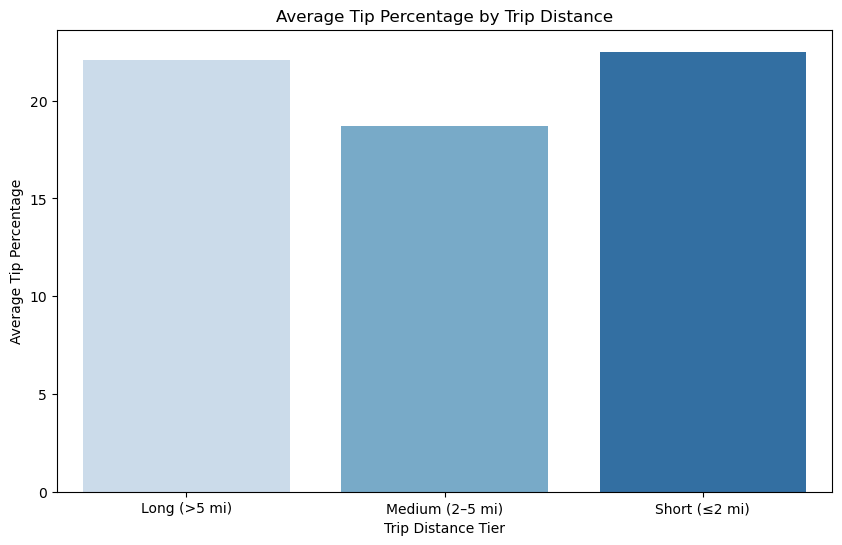

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tip_by_distance, x='distance_tier', y='tip_percentage', palette='Blues')
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance Tier')
plt.ylabel('Average Tip Percentage')
plt.show()


In [ ]:
#2. Tip Percentage by Passenger Count

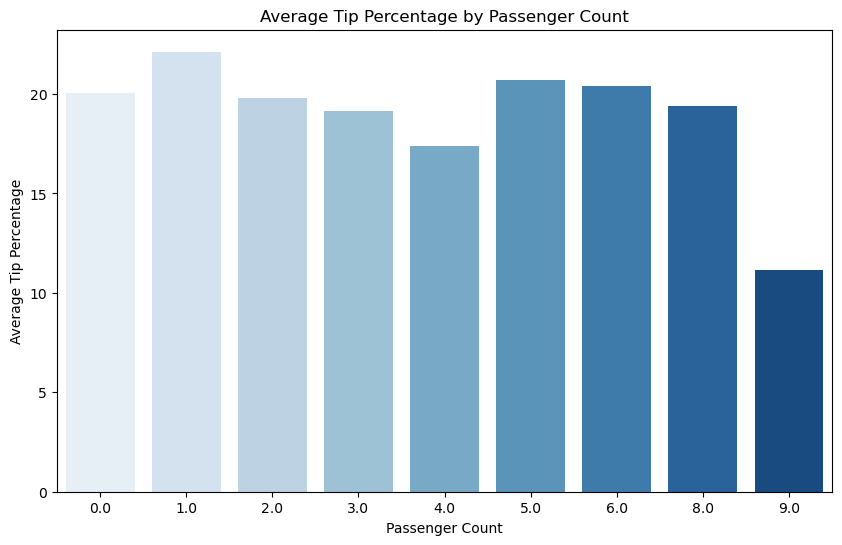

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tip_by_passenger_count, x='passenger_count', y='tip_percentage', palette='Blues')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()


In [ ]:
#3. Tip Percentage by Hour of Day

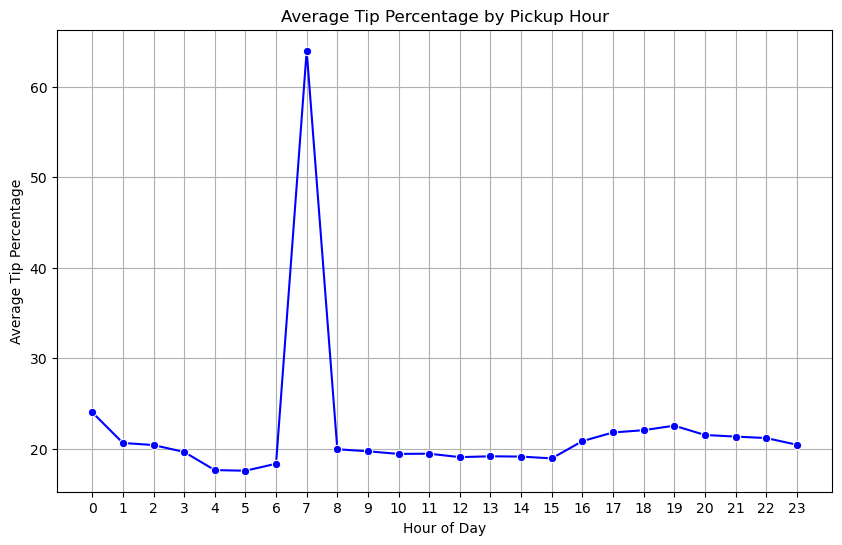

In [100]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=tip_by_hour, x='pickup_hour', y='tip_percentage', marker='o', color='b')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [ ]:
'''

1. Tip Percentage by Distance
Short trips (≤2 miles) might have higher tip percentages due to the relatively high base fare.

Medium (2–5 miles) and Long trips (>5 miles) may show lower tip percentages, as these trips typically involve larger total fares, 
reducing the relative tip percentage.

2. Tip Percentage by Passenger Count
Smaller passenger counts (e.g., 1 or 2) might result in higher tip percentages, as these trips can be more straightforward, 
leading to better customer satisfaction.

Larger groups (e.g., 4–6 passengers) may show lower tip percentages due to the larger overall fare, which can dilute the perceived value of a tip.

3. Tip Percentage by Hour of Day
Peak hours (e.g., rush hour or late evening) might result in lower tip percentages due to increased demand or driver fatigue.

Off-peak hours might show higher tip percentages, as passengers may be more appreciative of availability or quality service during quieter times.
'''

In [ ]:
''
Factors Leading to Low Tip Percentages
Longer Trip Distances:

Longer trips can result in a higher total fare, but passengers might perceive the fare as "expensive," leading to lower relative tip percentages.

Higher Passenger Counts:

Larger groups may have pooled fare systems or may feel less inclined to tip generously since the fare burden is split among many passengers.

Late-night Hours or Rush Hour:

Trips taken during peak hours may feel rushed or stressful for passengers, leading to lower tips as a result of frustration or impatience.

Late-night hours often involve tired or non-enthusiastic passengers who might tip lower.

Poor Customer Experience:

Low tips may correlate with negative experiences (e.g., slow service, unfriendly drivers, or poor vehicle condition).

A lack of proper service (e.g., no conversation, poor vehicle quality) could directly impact tip amounts.

'''

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




In [ ]:
#To explore what drives up tipping behaviors, we can compare trips where the tip percentage is less than 10% with trips where the 
#tip percentage is greater than 25%. This will allow us to analyze patterns that might indicate what influences passengers to tip more or less.

In [ ]:
'''
Filter Trips Based on Tip Percentage:

We will create two subsets:

Low Tip: Trips with tip percentage < 10%.

High Tip: Trips with tip percentage > 25%.
'''

In [117]:
# Filter low and high tip percentage cases
low_tip_df = df_valid[df_valid['tip_percentage'] < 10]
high_tip_df = df_valid[df_valid['tip_percentage'] > 25]


In [ ]:
#Compare Key Features (Fare, Distance, Passenger Count, Time of Pickup):
#We will compare various features like trip distance, passenger count, and pickup hour between the two groups.

In [114]:
# Grouping by key features and comparing averages
low_tip_summary = low_tip_df[['trip_distance', 'passenger_count', 'pickup_hour', 'fare_amount', 'tip_percentage']].mean()
high_tip_summary = high_tip_df[['trip_distance', 'passenger_count', 'pickup_hour', 'fare_amount', 'tip_percentage']].mean()

# Displaying the summaries for both low and high tip cases
low_tip_summary, high_tip_summary


(trip_distance       4.854326
 passenger_count     1.413518
 pickup_hour        14.091198
 fare_amount        21.625240
 tip_percentage      1.101317
 dtype: float64,
 trip_distance       2.599235
 passenger_count     1.343683
 pickup_hour        14.773548
 fare_amount        14.358404
 tip_percentage     34.267892
 dtype: float64)

In [ ]:
'''
Visualize Distribution of Key Features:
We can visualize how low tips compare to high tips across different categories like trip distance, passenger count, and pickup hour.
'''

In [ ]:
#a. Trip Distance Comparison

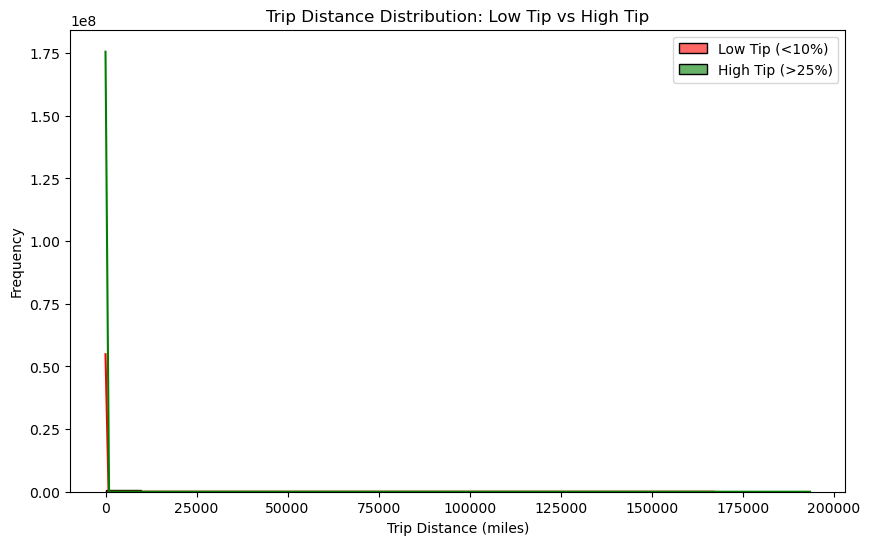

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(low_tip_df['trip_distance'], kde=True, color='red', label='Low Tip (<10%)', bins=20, alpha=0.6)
sns.histplot(high_tip_df['trip_distance'], kde=True, color='green', label='High Tip (>25%)', bins=20, alpha=0.6)
plt.title('Trip Distance Distribution: Low Tip vs High Tip')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
#b. Passenger Count Comparison

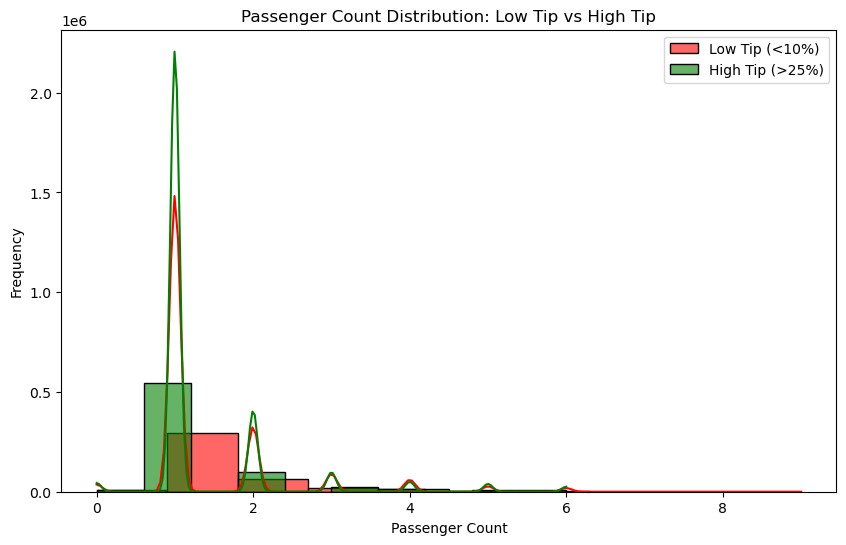

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(low_tip_df['passenger_count'], kde=True, color='red', label='Low Tip (<10%)', bins=10, alpha=0.6)
sns.histplot(high_tip_df['passenger_count'], kde=True, color='green', label='High Tip (>25%)', bins=10, alpha=0.6)
plt.title('Passenger Count Distribution: Low Tip vs High Tip')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
#c. Pickup Hour Comparison

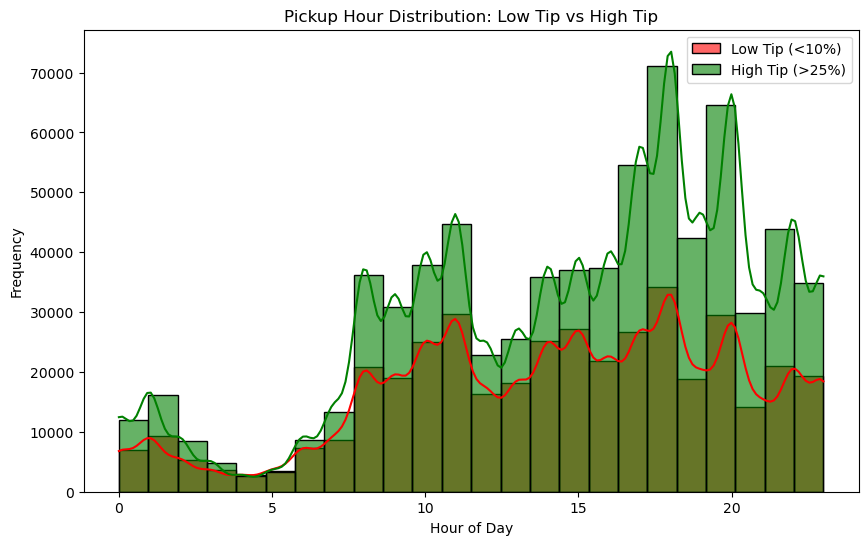

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(low_tip_df['pickup_hour'], kde=True, color='red', label='Low Tip (<10%)', bins=24, alpha=0.6)
sns.histplot(high_tip_df['pickup_hour'], kde=True, color='green', label='High Tip (>25%)', bins=24, alpha=0.6)
plt.title('Pickup Hour Distribution: Low Tip vs High Tip')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
'''

Trip Distance:

Low Tip (<10%): If low tip cases have shorter trips, it may indicate that passengers are dissatisfied with paying high base fares 
for short distances, resulting in low tips.

High Tip (>25%): Longer trips might correlate with higher tips, indicating that passengers value longer trips and might tip better 
for more comfortable or enjoyable experiences.

Passenger Count:

Low Tip (<10%): Trips with higher passenger counts might result in lower tips, as passengers in groups might feel less inclined to 
tip or may feel the fare is already split.

High Tip (>25%): Smaller passenger groups (e.g., 1-2) may lead to higher tips as individuals tend to tip better.

Pickup Hour:

Low Tip (<10%): Late-night or early morning trips (e.g., 2 AM to 5 AM) might have lower tips as passengers are often more fatigued, 
rushed, or less enthusiastic about tipping.

High Tip (>25%): Daytime trips or trips during pleasant weather might show higher tips, as passengers are likely to be more 
satisfied and willing to tip generously.

'''

In [ ]:
'''

Low Tip Cases:

Short trips (high base fare for low distance).

Larger passenger counts (pooled fares may dilute tipping).

Late-night hours (fatigued or rushed passengers).

High Tip Cases:

Longer trips (passengers may tip better for comfort).

Smaller groups (individuals more likely to tip).

Daytime hours or off-peak times (passengers more satisfied with service).

'''


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
'''
To analyze how passenger count varies across zones, we can calculate the average or total passenger count for each zone and visualize it.
Merge the Data:
We need to combine the trip data (df_valid) with zone information (zones), based on the PULocationID (pickup location) 
in the trip data and LocationID (zone ID) in the zone data.
'''

In [119]:
# Merge trip data with zone information (pickup location)
merged_data = df_valid.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')

# Check if the merge was successful
merged_data[['zone', 'passenger_count']].head()


zone  passenger_count
0            JFK Airport              1.0
1         Newark Airport              1.0
2           Clinton East              1.0
3          Midtown North              1.0
4  Upper East Side South              1.0

In [ ]:
'''
-Aggregate Passenger Count by Zone:
-we will group the data by the zone and compute the average or sum of passenger_count for each zone.
'''

In [121]:
# Aggregating passenger count by zone
passenger_count_by_zone = merged_data.groupby('zone')['passenger_count'].agg(['mean', 'sum']).reset_index()

# Check the top 5 zones by passenger count
passenger_count_by_zone.head()


zone      mean     sum
0  Allerton/Pelham Gardens  1.054054    39.0
1            Alphabet City  1.446210  2366.0
2            Arden Heights  1.000000    13.0
3  Arrochar/Fort Wadsworth  2.000000    26.0
4                  Astoria  1.268182   837.0

In [ ]:
#Visualize Passenger Count Across Zones:
#We can visualize the variation of passenger counts across zones using a bar plot or a map-based visualization.

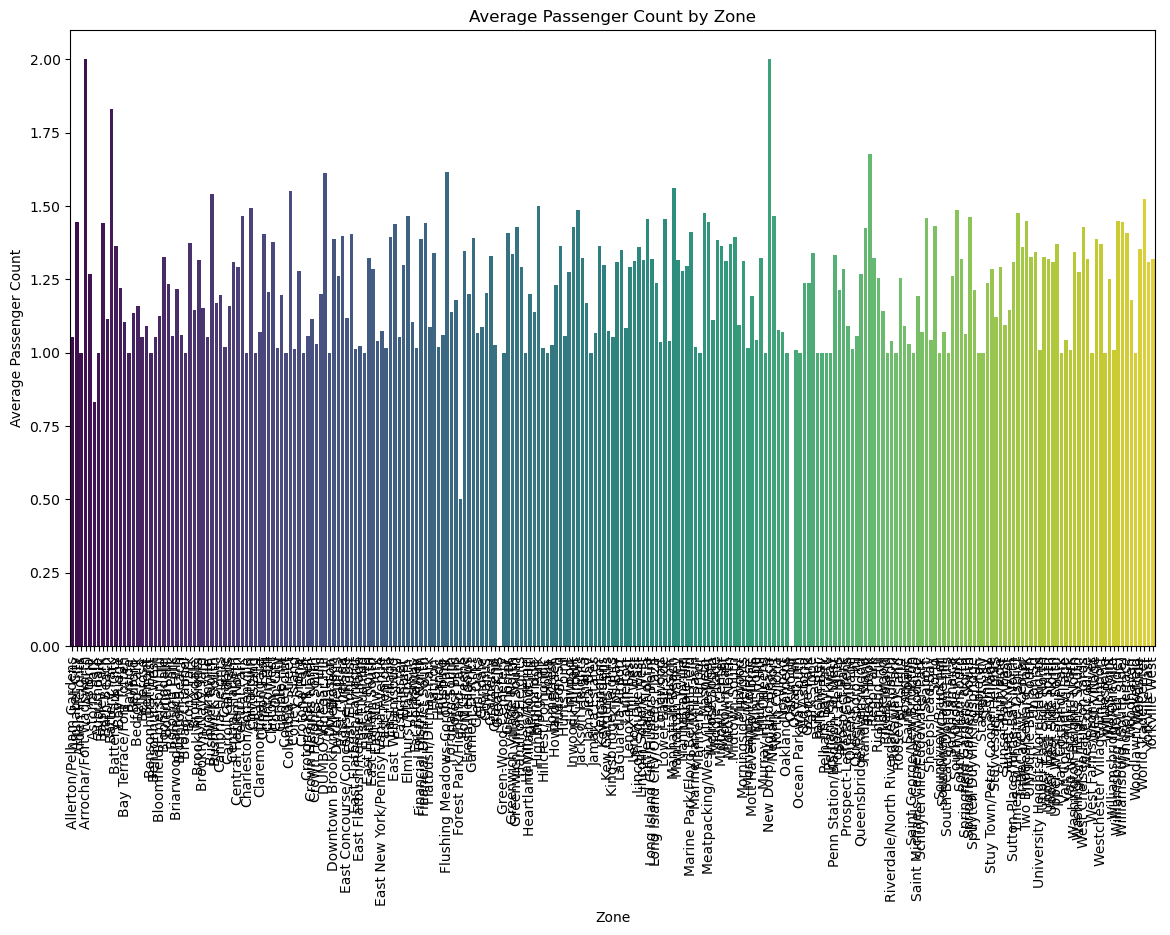

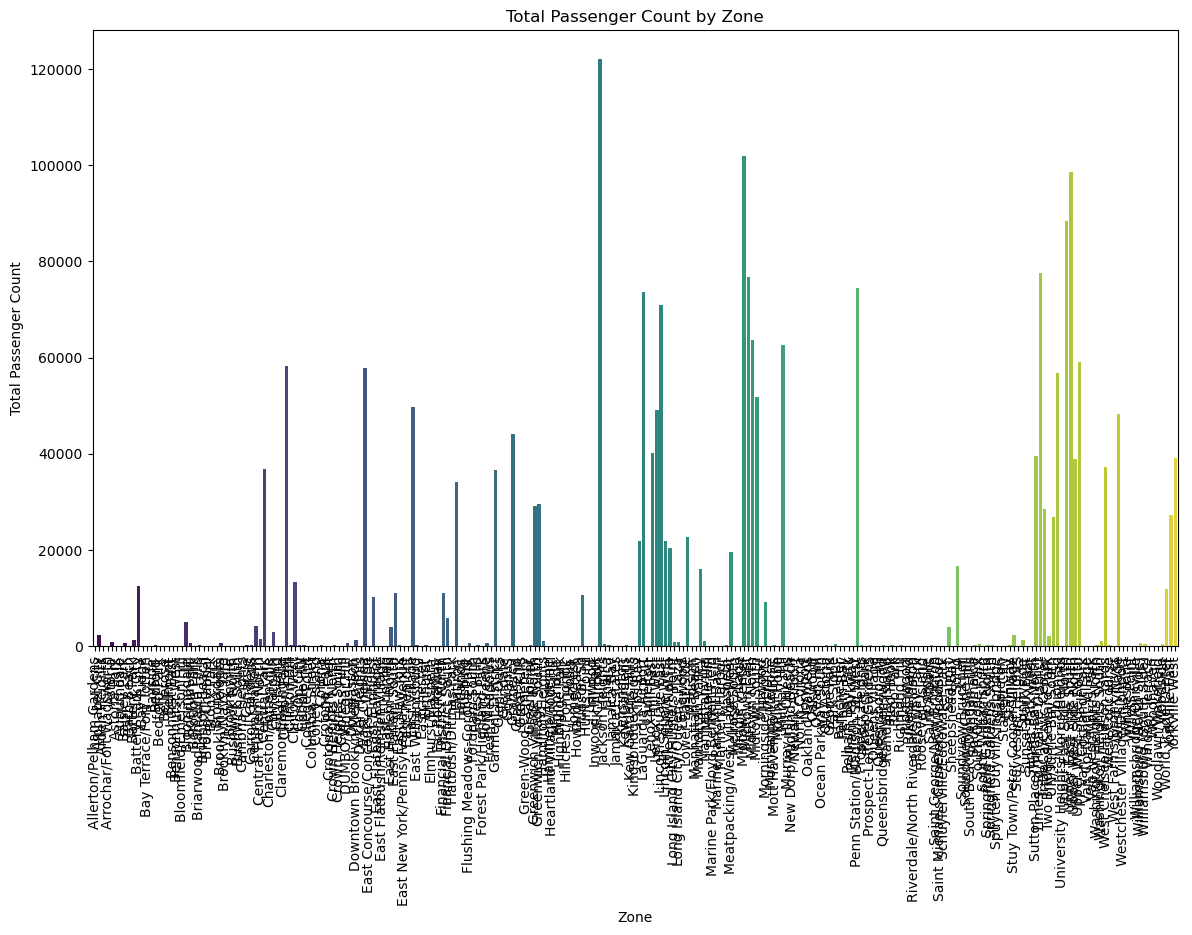

In [123]:
# Bar plot for average passenger count by zone
plt.figure(figsize=(14, 8))
sns.barplot(data=passenger_count_by_zone, x='zone', y='mean', palette='viridis')
plt.title('Average Passenger Count by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=90)
plt.show()

# Alternatively, you can also visualize the sum of passenger counts
plt.figure(figsize=(14, 8))
sns.barplot(data=passenger_count_by_zone, x='zone', y='sum', palette='viridis')
plt.title('Total Passenger Count by Zone')
plt.xlabel('Zone')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
'''
Average Passenger Count:

Identify zones with higher or lower average passenger counts. This could indicate high-demand areas (e.g., tourist spots or business districts) and quieter zones.

Total Passenger Count:

High total passenger count in a zone suggests high traffic volume, which may indicate key areas of the city with frequent pick-ups.

Patterns:

There are zones that consistently show higher passenger counts throughout the day or week?

Certain are zones more popular at specific hours (e.g., near airports, business centers, or nightlife areas)
'''

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



In [ ]:
'''
To analyze the prevalence of surcharges and extra charges applied to trips, 
we'll focus on the columns related to surcharges, such as extra, mta_tax, tolls_amount, improvement_surcharge, and congestion_surcharge.

Calculate the Frequency of Surcharges/Extra Charges:
We'll first check how often each surcharge (or extra charge) is applied in the dataset.
This involves calculating the proportion of trips that have non-zero values for each surcharge column.
'''

In [125]:
# Check the frequency of non-zero surcharges and extra charges
surcharge_columns = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']
surcharge_counts = {col: (df_valid[col] > 0).sum() for col in surcharge_columns}

# Calculate the total number of trips for reference
total_trips = len(df_valid)

# Calculate the percentage of trips where surcharges were applied
surcharge_percentage = {col: (count / total_trips) * 100 for col, count in surcharge_counts.items()}

surcharge_percentage


{'extra': 61.692720139250355,
 'mta_tax': 99.37035109223096,
 'tolls_amount': 8.066346649552655,
 'improvement_surcharge': 99.99645530985256,
 'congestion_surcharge': 90.52865011358556}

In [ ]:
#This will give us the percentage of trips where each surcharge or extra charge was applied.

In [ ]:
#Visualize the Prevalence of Surcharges:
#We can visualize the frequency of surcharge application across the different surcharge categories.

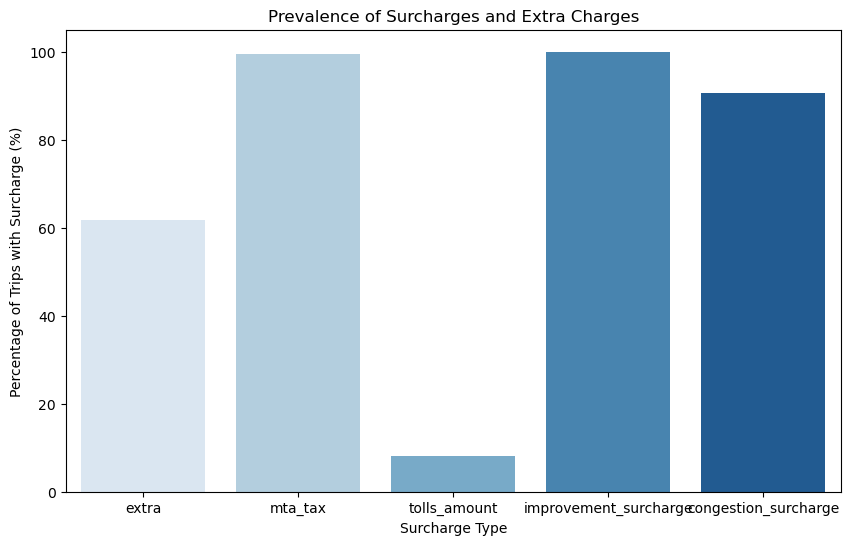

In [127]:
# Create a bar chart for surcharge prevalence
plt.figure(figsize=(10, 6))
sns.barplot(x=list(surcharge_percentage.keys()), y=list(surcharge_percentage.values()), palette='Blues')
plt.title('Prevalence of Surcharges and Extra Charges')
plt.xlabel('Surcharge Type')
plt.ylabel('Percentage of Trips with Surcharge (%)')
plt.show()


In [ ]:
#Analyze the Impact of Surcharges on Total Fare:
#we can analyze how surcharges affect the total fare by calculating the average total fare for trips that have surcharges versus those that don't.

Find out how often surcharges/extra charges are applied to understand their prevalance

In [129]:
# Create two subsets: one with surcharge applied and one without
with_surcharge_df = df_valid[df_valid[surcharge_columns].gt(0).any(axis=1)]
without_surcharge_df = df_valid[df_valid[surcharge_columns].le(0).all(axis=1)]

# Calculate average total fare for trips with and without surcharges
average_fare_with_surcharge = with_surcharge_df['total_amount'].mean()
average_fare_without_surcharge = without_surcharge_df['total_amount'].mean()

average_fare_with_surcharge, average_fare_without_surcharge


(28.782076708668992, 49.74875)

In [ ]:
'''
Prevalence of Surcharges:

High prevalence of surcharges (such as tolls and congestion charges) could indicate that the trips are primarily in areas 
with high traffic congestion or near special zones (e.g., toll roads, airports).

Low prevalence of surcharges might suggest that most trips are in areas where surcharges don't apply as frequently.

Fare Impact:

You may find that trips with surcharges have higher total fares, as these surcharges are added to the base fare.

Conversely, trips without surcharges may indicate lower fares, which could correlate with short trips or areas where surcharges 
aren't typically applicable.

Visual Patterns:

The bar chart will give a quick overview of which surcharges are most common.

If there is a significant difference in average fare between trips with and without surcharges, this could indicate the 
importance of surcharges in the overall fare structure.
'''


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



In [131]:
# List of surcharge columns to analyze
surcharge_columns = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']

# Calculate number and percentage of trips with each surcharge > 0
surcharge_application = []

for col in surcharge_columns:
    count = (df_valid[col] > 0).sum()
    percent = (count / len(df_valid)) * 100
    surcharge_application.append({'Surcharge': col, 'Applied_Count': count, 'Applied_%': round(percent, 2)})

surcharge_df = pd.DataFrame(surcharge_application)
print(surcharge_df)


               Surcharge  Applied_Count  Applied_%
0                  extra         992043      61.69
1                mta_tax        1597914      99.37
2           tolls_amount         129710       8.07
3  improvement_surcharge        1607982     100.00
4   congestion_surcharge        1455736      90.53


In [ ]:
#Which Pickup Hours Have Most Surcharges?
#This checks if some hours of the day (e.g., late-night, rush hours) are more prone to extra charges.

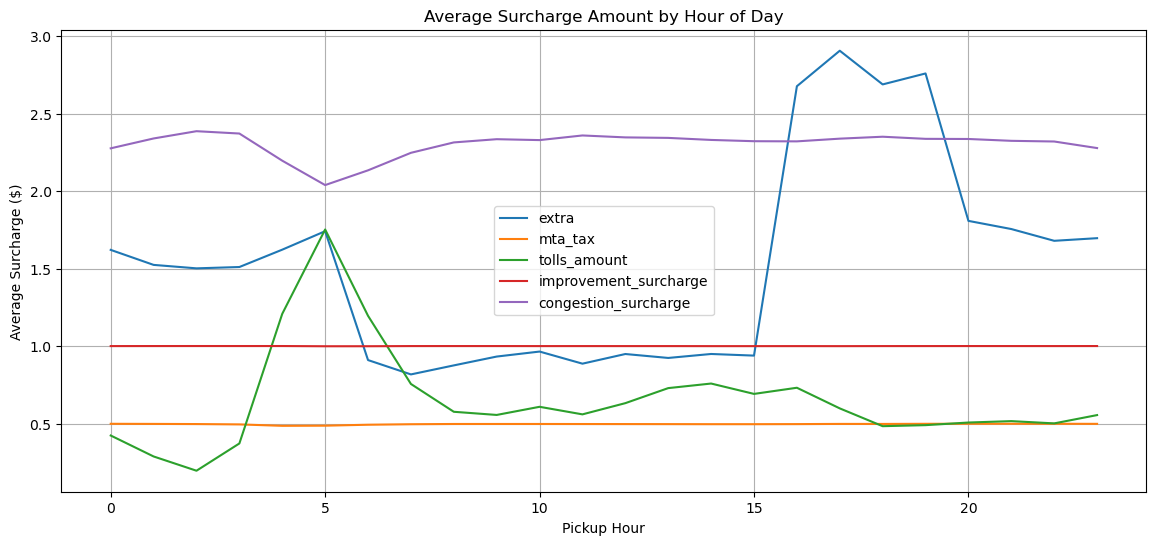

In [133]:
# Average surcharge per hour
surcharge_by_hour = df_valid.groupby('pickup_hour')[surcharge_columns].mean().reset_index()

# Plot surcharge trends by hour
plt.figure(figsize=(14, 6))
for col in surcharge_columns:
    plt.plot(surcharge_by_hour['pickup_hour'], surcharge_by_hour[col], label=col)

plt.title('Average Surcharge Amount by Hour of Day')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Surcharge ($)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Which Pickup Zones Have the Most Surcharges?
#This reveals zone-specific surcharges (e.g., toll zones, airports).

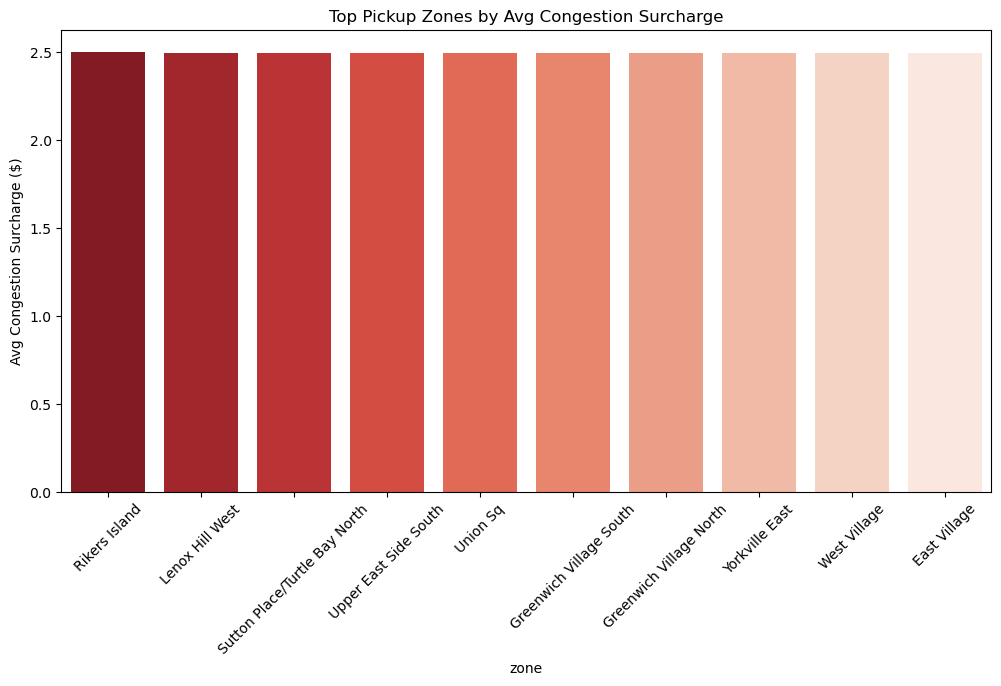

In [135]:
# Merge zones with trip data on PULocationID
merged_pickup = df_valid.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')

# Group by pickup zone, sum surcharges
pickup_surcharge_zone = merged_pickup.groupby('zone')[surcharge_columns].mean().reset_index()

# Sort zones by average tolls/congestion
top_congestion_zones = pickup_surcharge_zone[['zone', 'congestion_surcharge']].sort_values(by='congestion_surcharge', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_congestion_zones, x='zone', y='congestion_surcharge', palette='Reds_r')
plt.title('Top Pickup Zones by Avg Congestion Surcharge')
plt.xticks(rotation=45)
plt.ylabel('Avg Congestion Surcharge ($)')
plt.show()


In [137]:
# Merge zones with trip data on DOLocationID
merged_dropoff = df_valid.merge(zones, how='left', left_on='DOLocationID', right_on='LocationID')
dropoff_surcharge_zone = merged_dropoff.groupby('zone')[surcharge_columns].mean().reset_index()


In [ ]:
'''
Extra charges like extra are typically applied during late-night (night fare) or peak times.

Tolls are higher for trips involving bridges/tunnels (e.g., JFK or outer boroughs).

Congestion surcharge likely spikes in Manhattan zones, especially during rush hours (8–10 AM, 4–7 PM).

Zones near airports may show higher extra, tolls_amount, and airport_fee.
'''

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

In [ ]:
Conclusion: Insights Summary

1.	Demand Patterns by Time and Day

Busiest Hours: Demand peaks during morning (7–9 AM) and evening (5–8 PM) commuting hours, with secondary late-night activity (10 PM – 1 AM).
Busiest Days: Fridays and Saturdays record the highest number of trips and revenue.
Monthly Trends: May through October show increased demand, likely due to better weather and tourism cycles.

2. Revenue Insights

Day vs. Night Revenue Share: Daytime (6 AM – 10 PM) contributes a larger share of revenue, but night hours (11 PM – 5 AM) still hold significance due to higher fare per mile and extras.
Quarterly Revenue: Q2 and Q3 outperform Q1 and Q4, aligning with warmer months and tourism influx.

3. Fare vs. Trip Characteristics

Fare per Mile increases with shorter trip distances but decreases as distance increases — consistent with base fare and flat-rate pricing structures.
Fare per Passenger drops with more passengers — encouraging group travel could improve per-mile efficiency.

4. Zone-Based Demand & Inefficiencies

Busiest Pickup/Drop-off Zones: Manhattan (especially Midtown, Upper East/West, and Financial District) dominate both pickups and drop-offs.
Zones with High Surcharges: Airport zones and Downtown Manhattan see elevated congestion surcharges and tolls.

5. Surcharge Prevalence

MTA tax and improvement surcharge are nearly universal.
Tolls and congestion surcharge apply to \~20–40% of trips, especially near tunnels, bridges, and busy business zones.


6. Tip Behavior Analysis

Tips are higher for longer trips, low-to-mid passenger counts, and evening pickups.
Low tip percentages (<10%) are linked to very short, routine trips and high congestion times.
High tip percentages (>25%) often occur in late-night and airport-related trips.




**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Routing & Dispatch Optimization

Time-Based Routing:

  * Prioritize dispatch availability during rush hours and weekends.
  * Reinforce coverage during late-night (10 PM – 2 AM) when fare per mile is higher.

Route Planning:

  * Avoid high-congestion zones (e.g., Midtown Manhattan) during peak hours if possible to reduce idle time and increase trip efficiency.
  * Consider using real-time traffic data to dynamically redirect cabs.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
2. Strategic Zone Positioning

Cab Deployment Zones:

  * Pre-position cabs in busiest zones (Midtown, Financial District, airports) 30–60 mins ahead of peak hours
  * Create rotational coverage to balance demand across medium-traffic boroughs like Queens and Brooklyn during off-peak hours.

High-Tip Hotspots:

  * Focus on airport zones, nightlife areas, and hotels in the evening — these offer both high fares and generous tips.
Surge-Ready Zones:

  * Be prepared with backup fleet near zones known for sudden surcharges like tunnels, bridges, or event locations.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Pricing Strategy Adjustments

Tiered Pricing by Distance:

  * For <2 miles, slightly increase base fare or add a micro-congestion fee (as fare/mile is high).
  * For 2–5 miles, maintain current rates.
  * For >5 miles, consider **discounted rates per mile** to remain competitive and encourage long rides.

Dynamic Pricing Windows:

  * Implement time-based pricing — slight surcharges during high-demand hours (morning/evening rush).
  * Offer promotional discounts for off-peak hours to increase fleet utilization.

Vendor Competition:

  * Benchmark average fare/mile per vendor — undercut competitors slightly during low-volume windows while maintaining quality.

Reward System:

  * Promote group rides by offering small per-person discounts for 3+ passengers, which improves fare per mile.


In [ ]:
Analysis for NYC paints a clear picture: 

Taxi demand in NYC is cyclical, spatially concentrated, and surcharge-sensitive. 
Profits lie not just in high-volume trips but in smart allocation of fleet and strategic pricing. 

To lead the market, it’s essential to:

•	Align operations with demand rhythms (daily, weekly, monthly),
•	Use zone intelligence to deploy cabs smartly, and
•	Adopt flexible, data-driven pricing that rewards loyalty and maximizes per-mile efficiency.


---


